# 1. 필요 lib import

In [1]:
import numpy as np
import pandas as pd
import sklearn
import xgboost

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import os, sys

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
from lightgbm import LGBMClassifier

# 2. 데이터 셋 연도별로 불러와서 year이라는 dict에 저장

In [8]:
year = dict()
for i in range(2014, 2022):
    mal = pd.read_csv("../dataset/permissions/mal_perm_"+str(i)+".csv", index_col=0)
    ben = pd.read_csv("../dataset/permissions/ben_perm_"+str(i)+".csv", index_col=0)
    
    X = pd.concat([ben.sample(min(mal.shape[0], ben.shape[0]), random_state=42), mal])
    y = np.zeros((X.shape[0],1))
    y[min(mal.shape[0], ben.shape[0]):] = 1 # mal == 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    year[i] = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}


# 3. 연도별 모델의 dict 생성

## 3.1. Random Forest

In [13]:
rf_models = dict()

for i in range(2014, 2022):
    Rf_clf = RandomForestClassifier(n_jobs=-1)
    Rf_clf.fit(year[i]["X_train"], year[i]["y_train"])
    rf_models[i] = Rf_clf


C:\Users\32194363\AppData\Local\Temp\ipykernel_12372\3837875345.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf_clf.fit(year[i]["X_train"], year[i]["y_train"])
C:\Users\32194363\AppData\Local\Temp\ipykernel_12372\3837875345.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf_clf.fit(year[i]["X_train"], year[i]["y_train"])
C:\Users\32194363\AppData\Local\Temp\ipykernel_12372\3837875345.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf_clf.fit(year[i]["X_train"], year[i]["y_train"])
C:\Users\32194363\AppData\Local\Temp\ipykernel_12372\3837875345.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

accuracy 출력

In [15]:
for y in range(2014, 2022):
    print("trained year: ",y)
    for i in range(2014, 2022):
        print(i, "test set:", rf_models[y].score(year[i]["X_test"], year[i]["y_test"]), 
              i, "train set:", rf_models[y].score(year[i]["X_train"], year[i]["y_train"]))
    print()

trained year:  2014
2014 test set: 0.8704714640198511 2014 train set: 0.9308140977910151
2015 test set: 0.8345697329376854 2015 train set: 0.8287586547972304
2016 test set: 0.8006941001487358 2016 train set: 0.8083550266517913
2017 test set: 0.599354998759613 2017 train set: 0.6092053842813722
2018 test set: 0.6705 2018 train set: 0.678625
2019 test set: 0.7423343224530168 2019 train set: 0.7400445213950038
2020 test set: 0.7017592083562397 2020 train set: 0.7119243986254296
2021 test set: 0.7304740406320541 2021 train set: 0.736931240826465

trained year:  2015
2014 test set: 0.7831265508684864 2014 train set: 0.788843385455448
2015 test set: 0.8983679525222552 2015 train set: 0.9436201780415431
2016 test set: 0.8522558254833912 2016 train set: 0.8516177017478617
2017 test set: 0.6288762093773257 2017 train set: 0.6362508529247566
2018 test set: 0.72575 2018 train set: 0.728625
2019 test set: 0.8227002967359051 2019 train set: 0.8201211971308434
2020 test set: 0.7795492028587135 2020 

굳이 함수로 쓸 이유가 없었는데,, ㅅㅂ 암튼 함

## 3.2. XG Boost

In [16]:
def fit_all(model_dict, dataset):
    for i in range(2014, 2022):
        xg_clf = xgboost.XGBClassifier(tree_method='gpu_hist')
        xg_clf.fit(dataset[i]["X_train"], dataset[i]["y_train"])
        model_dict[i] = xg_clf
    return model_dict

In [17]:
xgb_models = dict()
xg_clf = xgboost.XGBClassifier(tree_method='gpu_hist')

xgb_models = fit_all(xgb_models, year)

C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

[15:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [18]:
def validate_all(model_dict, dataset):
    estim = dict()
    for y in range(2014, 2022):
        print("trained year: ",y)
        one_year = []
        for i in range(2014, 2022):
            test_score = model_dict[y].score(dataset[i]["X_test"], dataset[i]["y_test"])
            train_score = model_dict[y].score(dataset[i]["X_train"], dataset[i]["y_train"])
            one_year.append([test_score, train_score])
            print(i, "test set:", test_score, 
                  i, "train set:", train_score)
        print()
        estim[y] = one_year
    return estim

년도별 모델을 평가

In [20]:
xg_values = validate_all(xgb_models, year)

trained year:  2014
2014 test set: 0.8647642679900744 2014 train set: 0.888620004964011
2015 test set: 0.8343224530168151 2015 train set: 0.8259149357072205
2016 test set: 0.7863163113534953 2016 train set: 0.7947192264782447


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2017 test set: 0.5854626643512776 2017 train set: 0.5891073754729855
2018 test set: 0.64125 2018 train set: 0.6544375
2019 test set: 0.690158259149357 2019 train set: 0.6970071728914172
2020 test set: 0.65021990104453 2020 train set: 0.6654982817869416


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2021 test set: 0.7115124153498872 2021 train set: 0.7177373828610139

trained year:  2015
2014 test set: 0.7900744416873449 2014 train set: 0.7915735914619012
2015 test set: 0.8914441147378833 2015 train set: 0.9080736894164194
2016 test set: 0.8346554288547348 2016 train set: 0.8306061732986241


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2017 test set: 0.5899280575539568 2017 train set: 0.6057936852552571
2018 test set: 0.68025 2018 train set: 0.680375
2019 test set: 0.7685459940652819 2019 train set: 0.7639129359386594
2020 test set: 0.7236118746564046 2020 train set: 0.7275601374570446


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2021 test set: 0.727765237020316 2021 train set: 0.7292536976402845

trained year:  2016
2014 test set: 0.7791563275434243 2014 train set: 0.7834450235790519
2015 test set: 0.8595450049455984 2015 train set: 0.8535484668644906
2016 test set: 0.887456618740704 2016 train set: 0.9085161770174787


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2017 test set: 0.6755147606053089 2017 train set: 0.6880466472303207
2018 test set: 0.76275 2018 train set: 0.7683125
2019 test set: 0.8372898120672602 2019 train set: 0.8327355923818947


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2020 test set: 0.7864211105002749 2020 train set: 0.7898281786941581
2021 test set: 0.728668171557562 2021 train set: 0.7396409619509993

trained year:  2017
2014 test set: 0.6794044665012406 2014 train set: 0.6731198808637379
2015 test set: 0.7542037586547973 2015 train set: 0.7458580613254204


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2016 test set: 0.7850768468021815 2016 train set: 0.8004214701871823
2017 test set: 0.835276606301166 2017 train set: 0.8528006947459835
2018 test set: 0.774 2018 train set: 0.7841875
2019 test set: 0.7660731948565777 2019 train set: 0.7596463022508039


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2020 test set: 0.7190764156129742 2020 train set: 0.7229553264604811
2021 test set: 0.5575620767494357 2021 train set: 0.5797674156034774

trained year:  2018
2014 test set: 0.7143920595533498 2014 train set: 0.7151278232812113
2015 test set: 0.7816518298714145 2015 train set: 0.7723170128585559


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2016 test set: 0.7868120971740208 2016 train set: 0.7913102764348581
2017 test set: 0.7194244604316546 2017 train set: 0.7279945412815582
2018 test set: 0.83125 2018 train set: 0.862
2019 test set: 0.8689416419386746 2019 train set: 0.8711352955725946


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2020 test set: 0.7945299615173173 2020 train set: 0.7961512027491409
2021 test set: 0.581489841986456 2021 train set: 0.5839449023371345

trained year:  2019
2014 test set: 0.6992555831265509 2014 train set: 0.7002978406552495
2015 test set: 0.7912957467853611 2015 train set: 0.7874629080118695
2016 test set: 0.7878036688150719 2016 train set: 0.7942853601090863


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2017 test set: 0.6512031753907219 2017 train set: 0.6587060356057316
2018 test set: 0.788 2018 train set: 0.7911875
2019 test set: 0.9112265084075173 2019 train set: 0.9327850605985655
2020 test set: 0.8639362286970863 2020 train set: 0.8607560137457044


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2021 test set: 0.618510158013544 2021 train set: 0.6252681494862821

trained year:  2020
2014 test set: 0.705955334987593 2014 train set: 0.7048895507570117
2015 test set: 0.7809099901088031 2015 train set: 0.7778808110781404
2016 test set: 0.7816063460585028 2016 train set: 0.7771166480723937
2017 test set: 0.6469858595881915 2017 train set: 0.6577755722349731
2018 test set: 0.7785 2018 train set: 0.781375
2019 test set: 0.9008407517309595 2019 train set: 0.8951273806579273


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2020 test set: 0.8988455195162177 2020 train set: 0.9063917525773196
2021 test set: 0.8302483069977427 2021 train set: 0.8354973467313989

trained year:  2021
2014 test set: 0.7032258064516129 2014 train set: 0.7092330603127327
2015 test set: 0.7670623145400594 2015 train set: 0.76162215628091
2016 test set: 0.7563212692117005 2016 train set: 0.7598239742159415


C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

2017 test set: 0.6216819647730092 2017 train set: 0.6272563736740897
2018 test set: 0.75175 2018 train set: 0.760625
2019 test set: 0.8674579624134521 2019 train set: 0.8608706406134059
2020 test set: 0.8492303463441452 2020 train set: 0.8493470790378007
2021 test set: 0.9020316027088036 2021 train set: 0.9252568589815965



C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

In [21]:
label = [i for i in range(2014,2022)]
test_val = []
for year in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(xg_values[year][j][0])
    test_val.append(one_y)
test_val

[[0.8647642679900744,
  0.8343224530168151,
  0.7863163113534953,
  0.5854626643512776,
  0.64125,
  0.690158259149357,
  0.65021990104453,
  0.7115124153498872],
 [0.7900744416873449,
  0.8914441147378833,
  0.8346554288547348,
  0.5899280575539568,
  0.68025,
  0.7685459940652819,
  0.7236118746564046,
  0.727765237020316],
 [0.7791563275434243,
  0.8595450049455984,
  0.887456618740704,
  0.6755147606053089,
  0.76275,
  0.8372898120672602,
  0.7864211105002749,
  0.728668171557562],
 [0.6794044665012406,
  0.7542037586547973,
  0.7850768468021815,
  0.835276606301166,
  0.774,
  0.7660731948565777,
  0.7190764156129742,
  0.5575620767494357],
 [0.7143920595533498,
  0.7816518298714145,
  0.7868120971740208,
  0.7194244604316546,
  0.83125,
  0.8689416419386746,
  0.7945299615173173,
  0.581489841986456],
 [0.6992555831265509,
  0.7912957467853611,
  0.7878036688150719,
  0.6512031753907219,
  0.788,
  0.9112265084075173,
  0.8639362286970863,
  0.618510158013544],
 [0.7059553349875

In [22]:
train_val = []
for year in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(xg_values[year][j][1])
    train_val.append(one_y)
train_val

[[0.888620004964011,
  0.8259149357072205,
  0.7947192264782447,
  0.5891073754729855,
  0.6544375,
  0.6970071728914172,
  0.6654982817869416,
  0.7177373828610139],
 [0.7915735914619012,
  0.9080736894164194,
  0.8306061732986241,
  0.6057936852552571,
  0.680375,
  0.7639129359386594,
  0.7275601374570446,
  0.7292536976402845],
 [0.7834450235790519,
  0.8535484668644906,
  0.9085161770174787,
  0.6880466472303207,
  0.7683125,
  0.8327355923818947,
  0.7898281786941581,
  0.7396409619509993],
 [0.6731198808637379,
  0.7458580613254204,
  0.8004214701871823,
  0.8528006947459835,
  0.7841875,
  0.7596463022508039,
  0.7229553264604811,
  0.5797674156034774],
 [0.7151278232812113,
  0.7723170128585559,
  0.7913102764348581,
  0.7279945412815582,
  0.862,
  0.8711352955725946,
  0.7961512027491409,
  0.5839449023371345],
 [0.7002978406552495,
  0.7874629080118695,
  0.7942853601090863,
  0.6587060356057316,
  0.7911875,
  0.9327850605985655,
  0.8607560137457044,
  0.6252681494862821]

In [23]:
train_val[0]

[0.888620004964011,
 0.8259149357072205,
 0.7947192264782447,
 0.5891073754729855,
 0.6544375,
 0.6970071728914172,
 0.6654982817869416,
 0.7177373828610139]

Text(0.5, 1.0, 'T by 2014, XGboost')

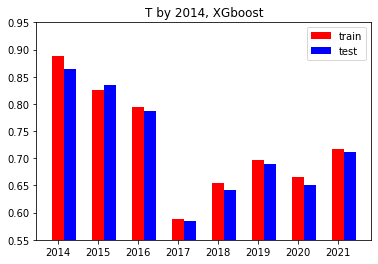

In [24]:
x = np.arange(len(label))
plt.bar(x, train_val[0], label="train", width=0.3, color='r')
plt.bar(x+0.3, test_val[0], label="test", width=0.3, color='b')

plt.xticks(x, label)
plt.ylim(0.55, 0.95)
plt.legend()
plt.title("T by 2014, XGboost")
# plt.savefig("./vis/T by 2014, XGboost.png")

어디서 씨발 year을 for문에 쳐넣어서 날라감 다시 불러옴

In [32]:
year = dict()
for i in range(2014, 2022):
    mal = pd.read_csv("../dataset/permissions/mal_perm_"+str(i)+".csv", index_col=0)
    ben = pd.read_csv("../dataset/permissions/ben_perm_"+str(i)+".csv", index_col=0)
    
    X = pd.concat([ben.sample(min(mal.shape[0], ben.shape[0]), random_state=42), mal])
    y = np.zeros((X.shape[0],1))
    y[min(mal.shape[0], ben.shape[0]):] = 1 # mal == 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    year[i] = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}

뒤늦게 rf 평가

In [33]:
rf_values = validate_all(rf_models, year)

trained year:  2014
2014 test set: 0.8704714640198511 2014 train set: 0.9308140977910151
2015 test set: 0.8345697329376854 2015 train set: 0.8287586547972304
2016 test set: 0.8006941001487358 2016 train set: 0.8083550266517913
2017 test set: 0.599354998759613 2017 train set: 0.6092053842813722
2018 test set: 0.6705 2018 train set: 0.678625
2019 test set: 0.7423343224530168 2019 train set: 0.7400445213950038
2020 test set: 0.7017592083562397 2020 train set: 0.7119243986254296
2021 test set: 0.7304740406320541 2021 train set: 0.736931240826465

trained year:  2015
2014 test set: 0.7831265508684864 2014 train set: 0.788843385455448
2015 test set: 0.8983679525222552 2015 train set: 0.9436201780415431
2016 test set: 0.8522558254833912 2016 train set: 0.8516177017478617
2017 test set: 0.6288762093773257 2017 train set: 0.6362508529247566
2018 test set: 0.72575 2018 train set: 0.728625
2019 test set: 0.8227002967359051 2019 train set: 0.8201211971308434
2020 test set: 0.7795492028587135 2020 

### RF visualize

In [34]:
test_val = []
for y in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(rf_values[y][j][0])
    test_val.append(one_y)
    
train_val = []
for y in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(rf_values[y][j][1])
    train_val.append(one_y)
    
for i in range(2014,2022):
    plt.figure()
    plt.bar(x, train_val[i-2014], label="train", width=0.3, color='#3BC6D3')
    plt.bar(x+0.3, test_val[i-2014], label="test", width=0.3, color='#E64B5E')
    plt.xticks(x, label)
    plt.ylim(0.55, 0.95)
    plt.legend()
    plt.title("T by "+str(i)+", RandomForest")
    plt.savefig("./vis/rf/T by "+str(i)+", RandomForest.png")
    plt.close()

### XG boost 모델 visualize

In [28]:
# xg boost visualization

test_val = []
for y in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(xg_values[y][j][0])
    test_val.append(one_y)
    
train_val = []
for y in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(xg_values[y][j][1])
    train_val.append(one_y)
    
for i in range(2014,2022):
    plt.figure()
    plt.bar(x, train_val[i-2014], label="train", width=0.3, color='#3BC6D3')
    plt.bar(x+0.3, test_val[i-2014], label="test", width=0.3, color='#E64B5E')
    plt.xticks(x, label)
    plt.ylim(0.55, 0.95)
    plt.legend()
    plt.title("T by "+str(i)+", XGboost")
    plt.savefig("./vis/xg/T by "+str(i)+", XGboost.png")
    plt.close()

## 3.3. Light GBM

In [36]:
def fit_all(model_dict, dataset):
    for i in range(2014, 2022):
        lgbm_classifier = LGBMClassifier()
        lgbm_classifier.fit(dataset[i]["X_train"], dataset[i]["y_train"])
        model_dict[i] = lgbm_classifier
    return model_dict

lgbm_models = dict()
lgbm_models = fit_all(lgbm_models, year)
lgbm_values = validate_all(lgbm_models, year)

C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\32194363\Anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d a

trained year:  2014
2014 test set: 0.862531017369727 2014 train set: 0.8808637379002234
2015 test set: 0.8390207715133531 2015 train set: 0.8320969337289812
2016 test set: 0.7860684184432325 2016 train set: 0.7906284864261808
2017 test set: 0.586454973951873 2017 train set: 0.5915886111283419
2018 test set: 0.64675 2018 train set: 0.6580625
2019 test set: 0.7237883283877349 2019 train set: 0.7265644323522137
2020 test set: 0.677570093457944 2020 train set: 0.6848453608247422
2021 test set: 0.7218961625282168 2021 train set: 0.7329795641865191

trained year:  2015
2014 test set: 0.7895781637717122 2014 train set: 0.7944899478778853
2015 test set: 0.8914441147378833 2015 train set: 0.8981206726013847
2016 test set: 0.8440753594447199 2016 train set: 0.84436593529193
2017 test set: 0.6127511783676507 2017 train set: 0.617455492835432
2018 test set: 0.699 2018 train set: 0.6941875
2019 test set: 0.7915430267062314 2019 train set: 0.7872866683156072
2020 test set: 0.7472512369433755 2020 tr

In [38]:
# lgbm visualization

test_val = []
for y in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(lgbm_values[y][j][0])
    test_val.append(one_y)
    
train_val = []
for y in label:
    one_y = []
    for j in range(len(label)):
        one_y.append(lgbm_values[y][j][1])
    train_val.append(one_y)
    
for i in range(2014,2022):
    plt.figure()
    plt.bar(x, train_val[i-2014], label="train", width=0.3, color='#3BC6D3')
    plt.bar(x+0.3, test_val[i-2014], label="test", width=0.3, color='#E64B5E')
    plt.xticks(x, label)
    plt.ylim(0.55, 0.95)
    plt.legend()
    plt.title("T by "+str(i)+", LGBM")
    plt.savefig("./vis/lgbm/T by "+str(i)+", LGBM.png")
    plt.close()

# 4. Feature importance visualization

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

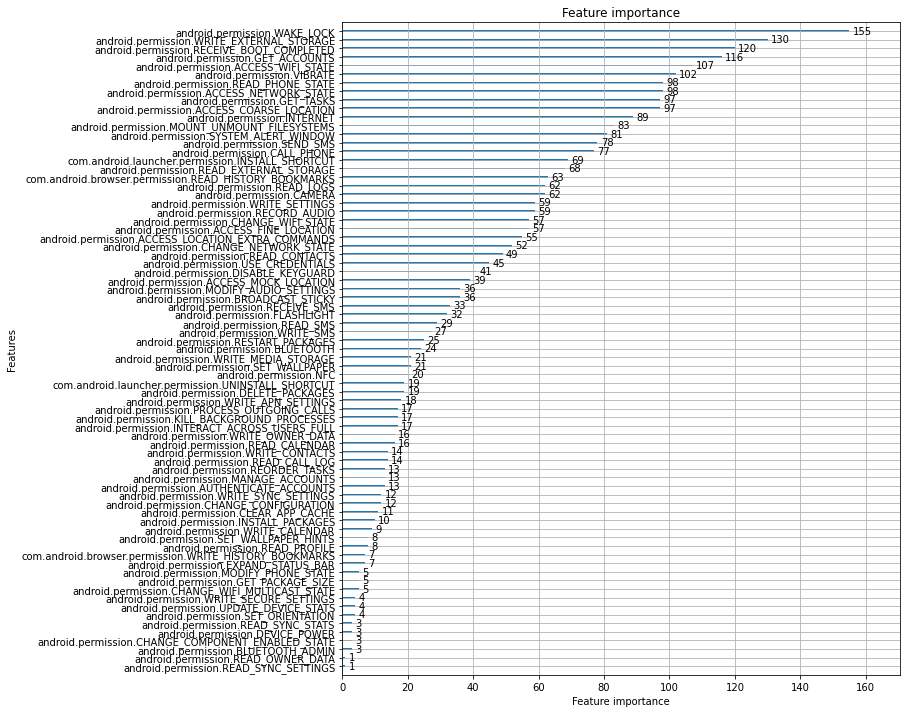

In [166]:
from lightgbm import plot_importance

# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_models[2014], ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

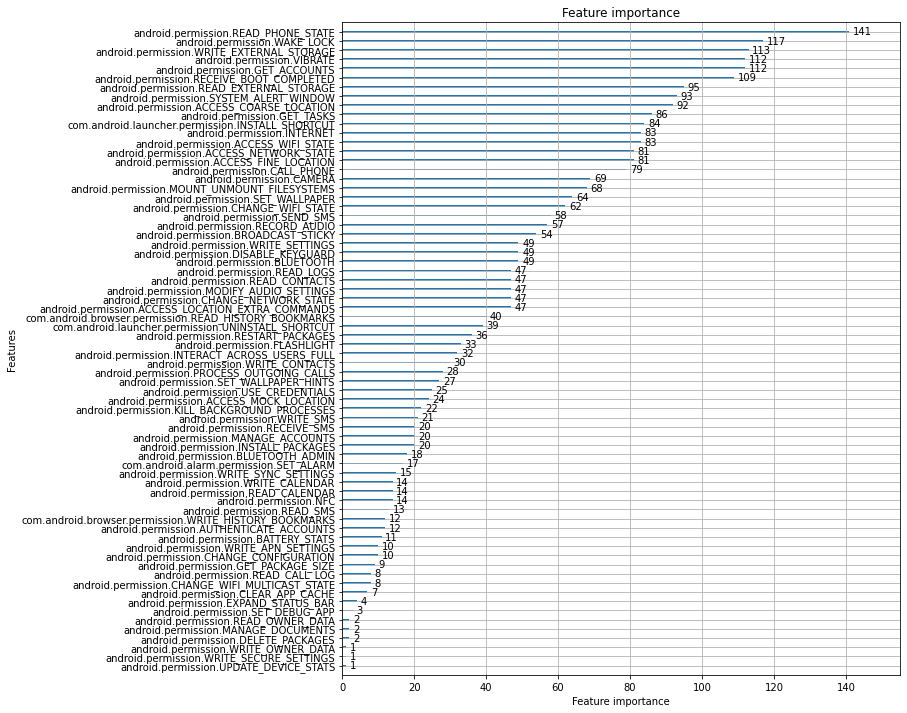

In [167]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_models[2015], ax=ax)

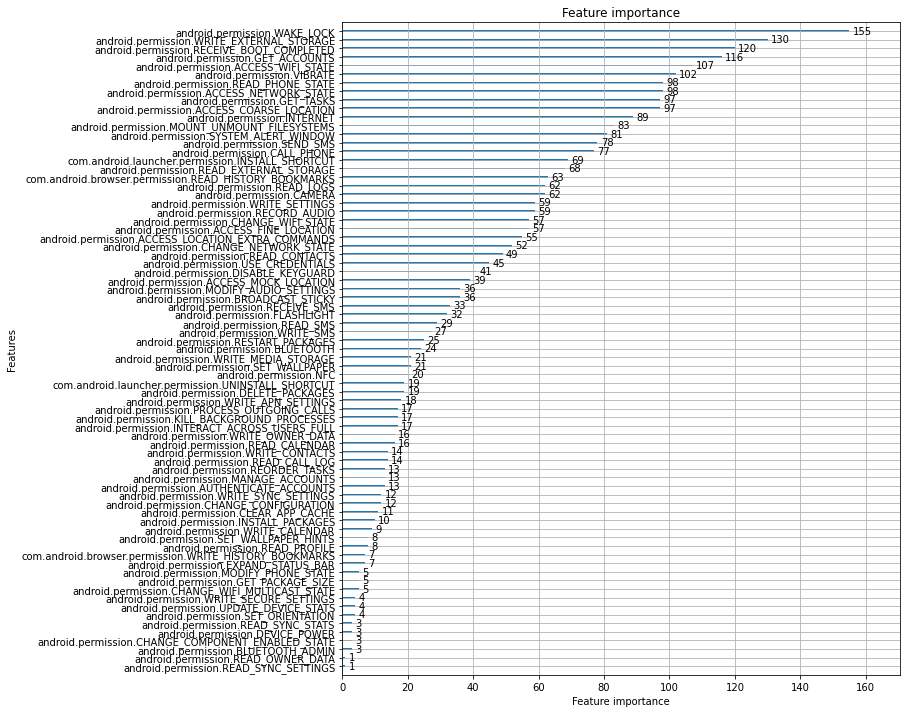

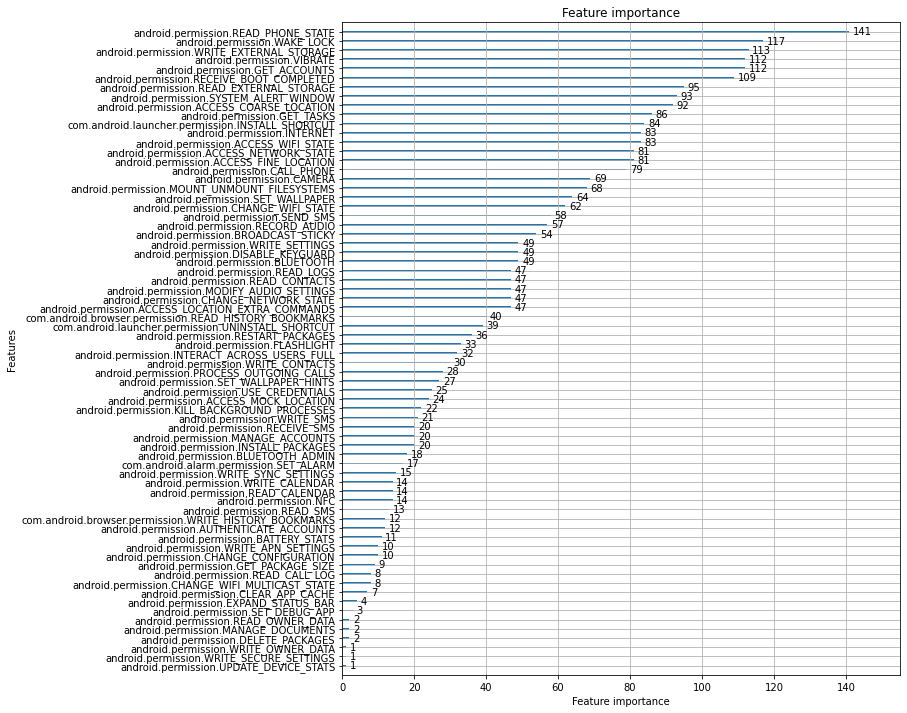

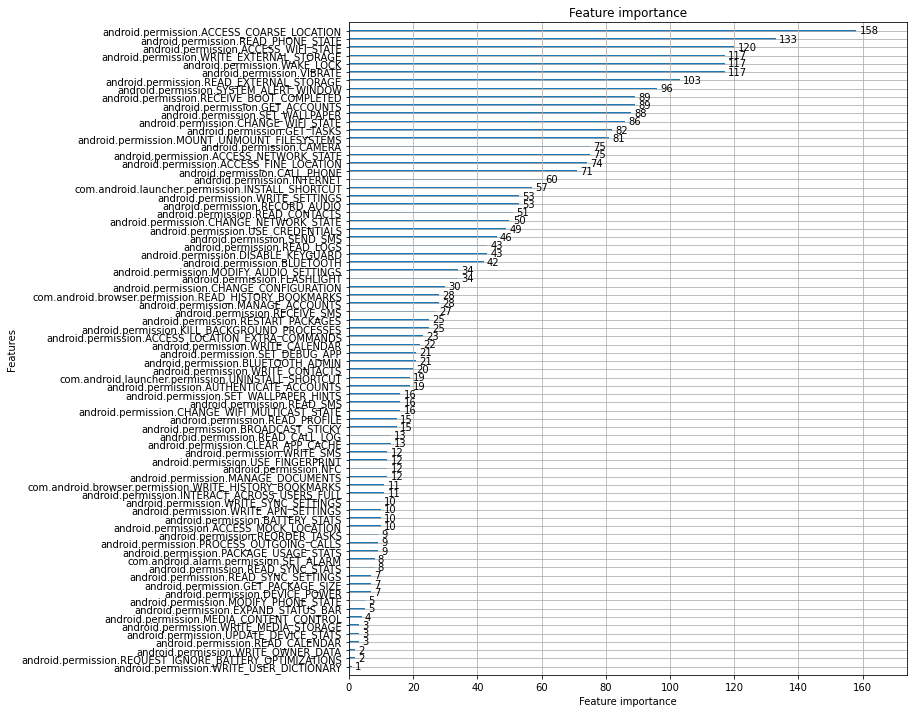

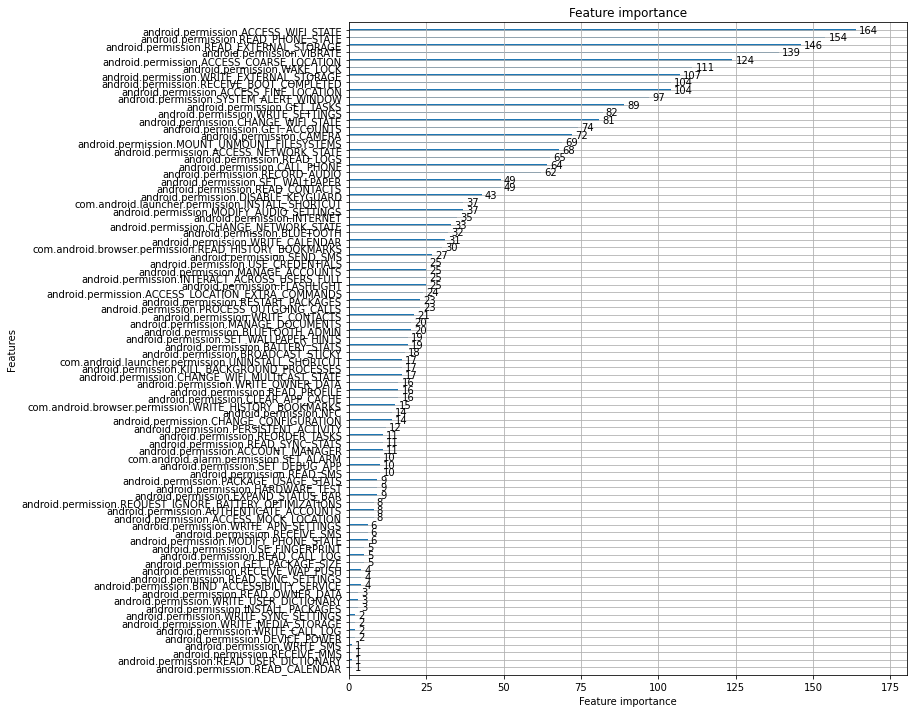

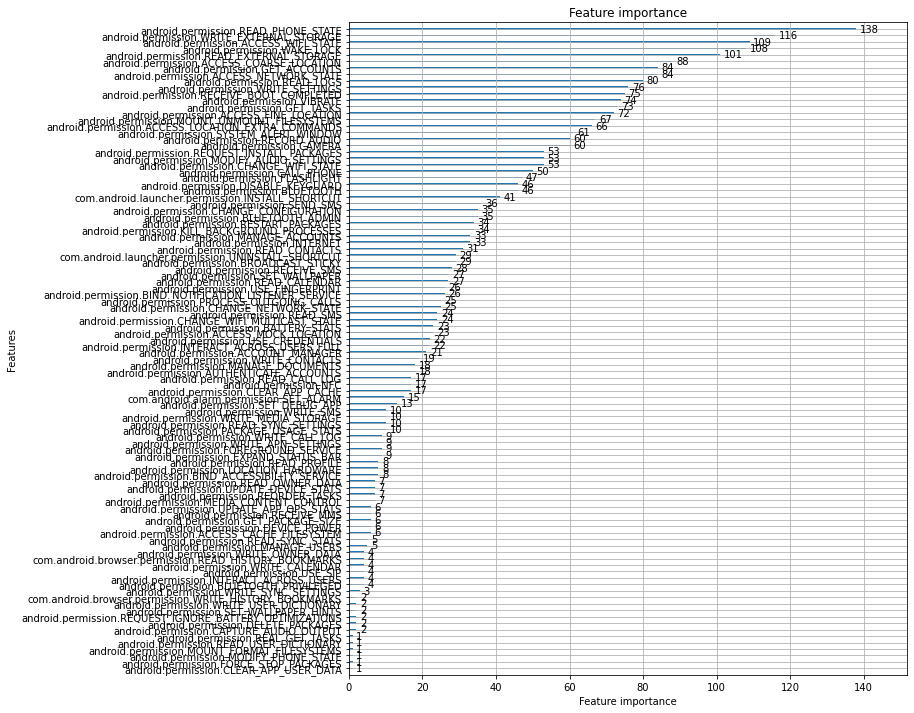

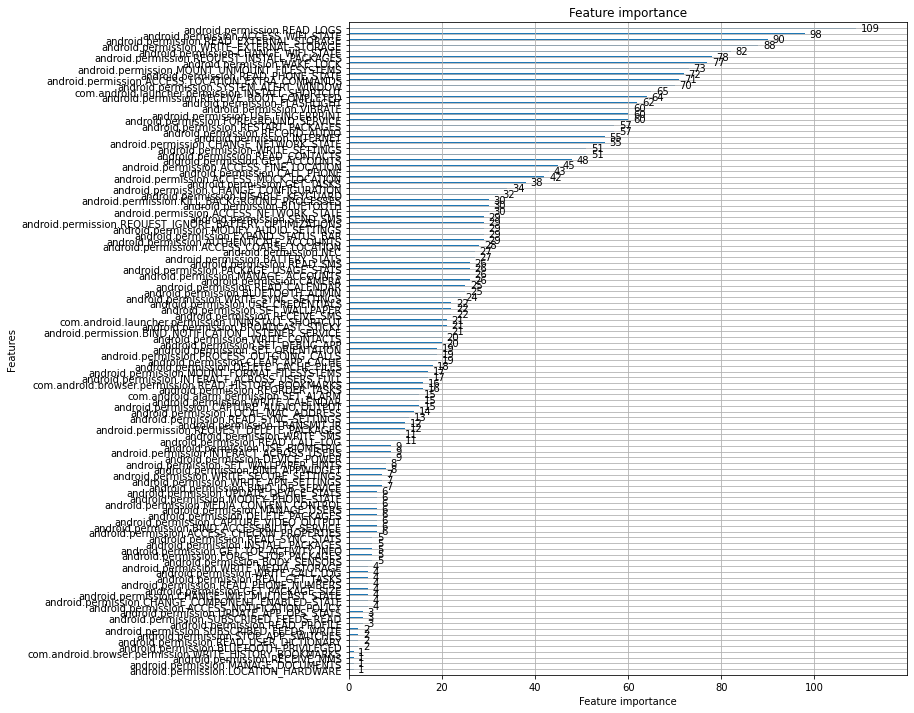

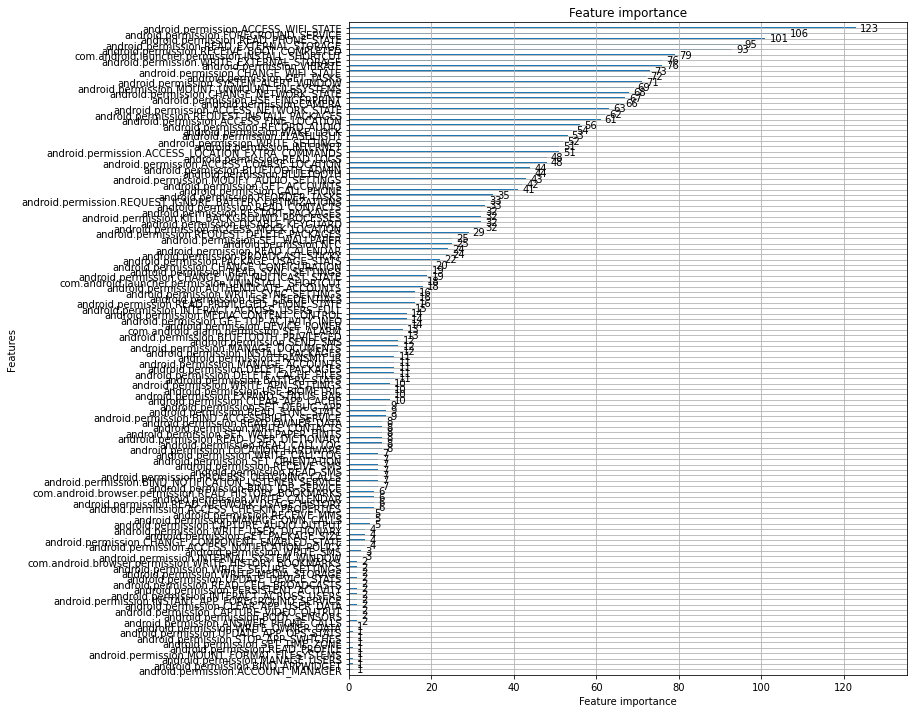

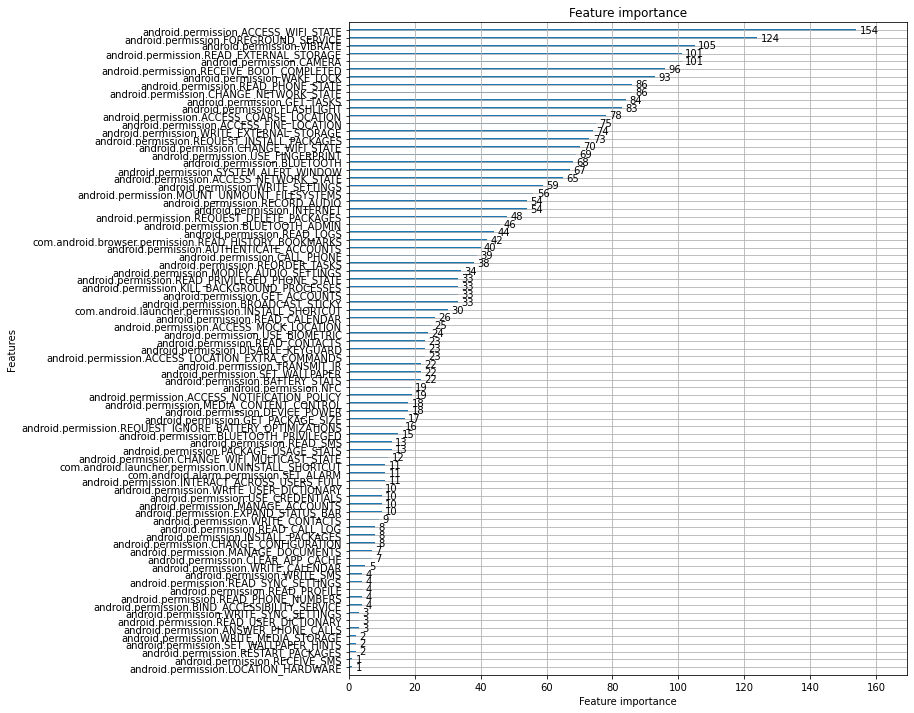

In [168]:
for i in range(2014, 2022):
    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(lgbm_models[i], ax=ax)

In [179]:
np.sort(lgbm_models[2014].feature_importances_)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

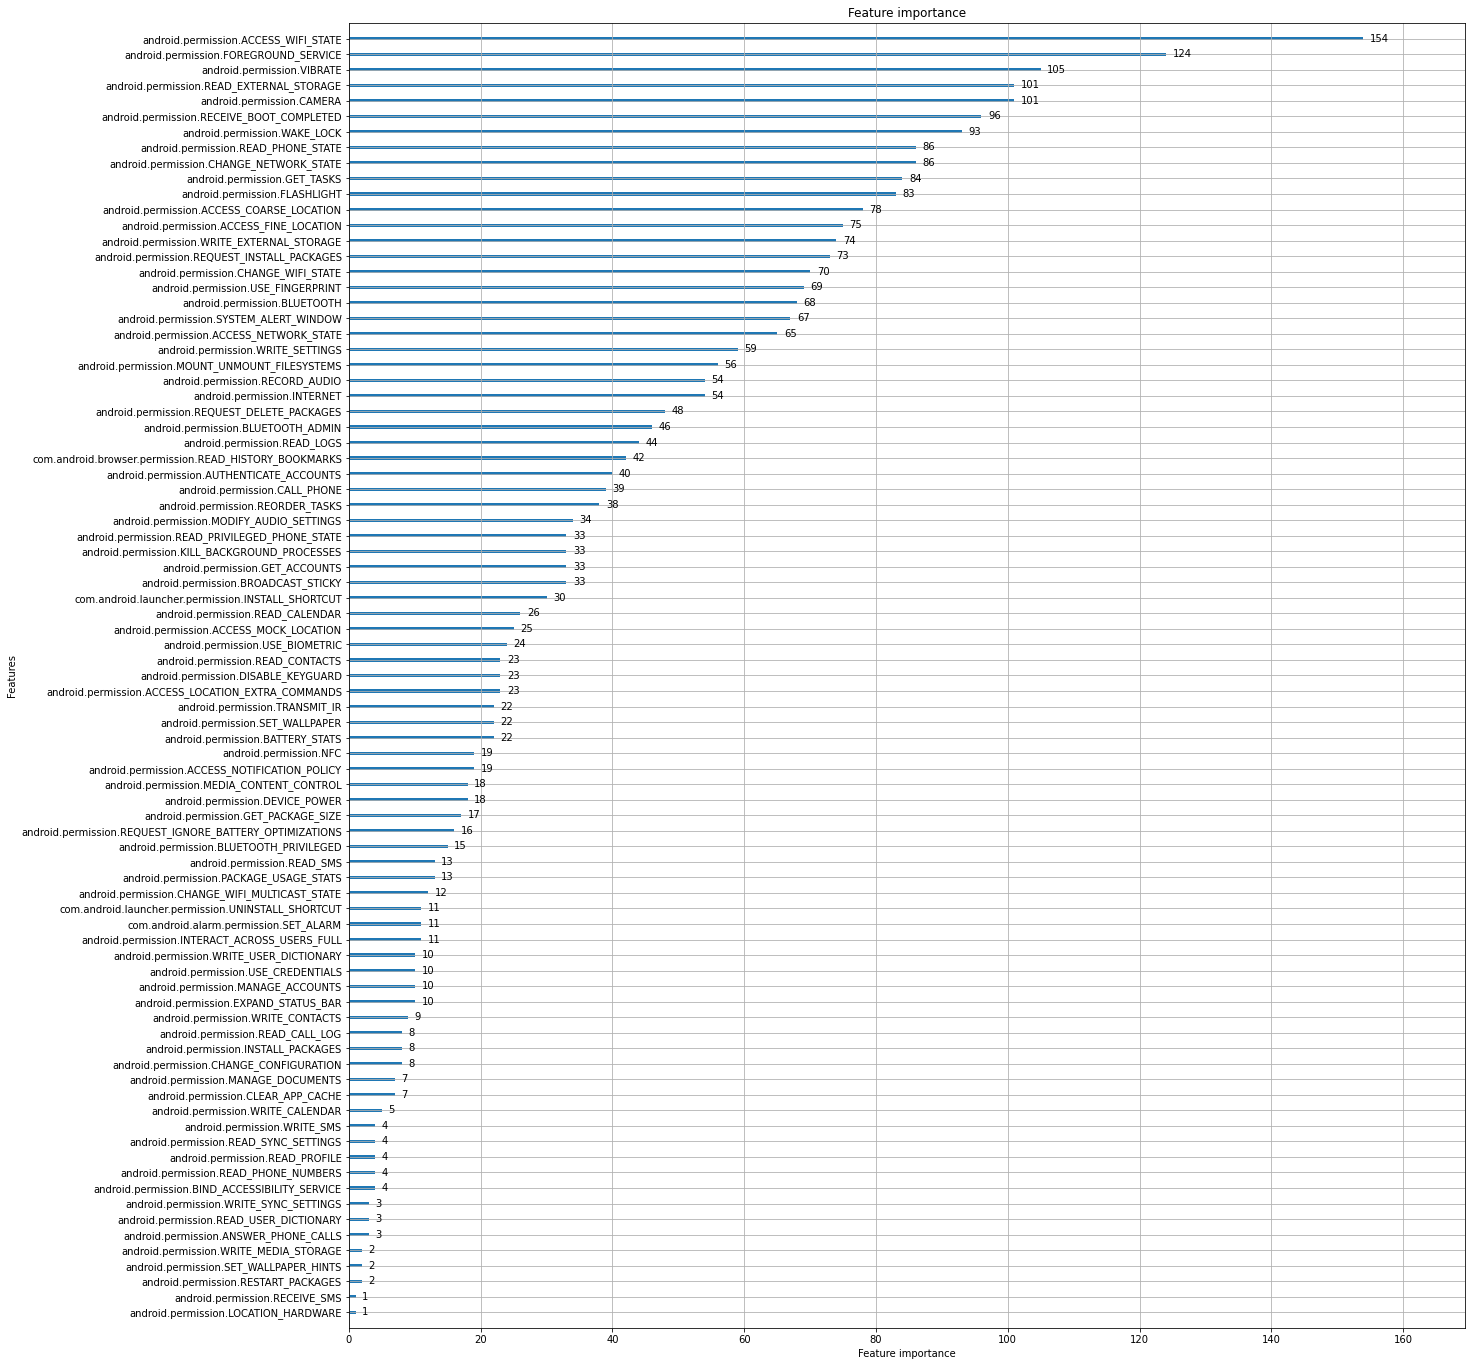

In [180]:
fig, ax = plt.subplots(figsize=(20,24))
plot_importance(lgbm_models[2014], ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

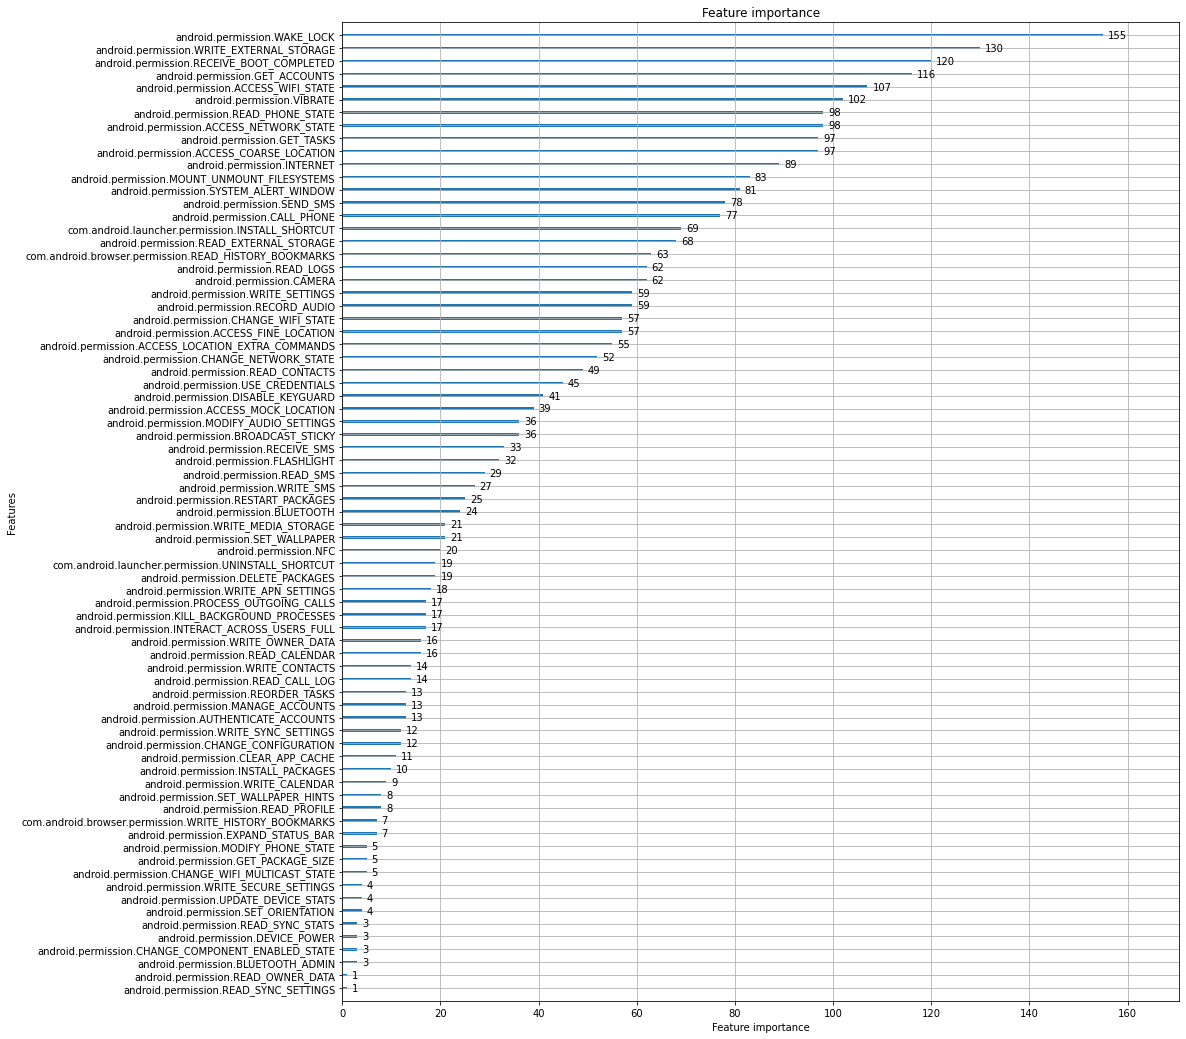

In [185]:
fig, ax = plt.subplots(figsize=(15,18))
plot_importance(lgbm_models[2014], ax=ax)

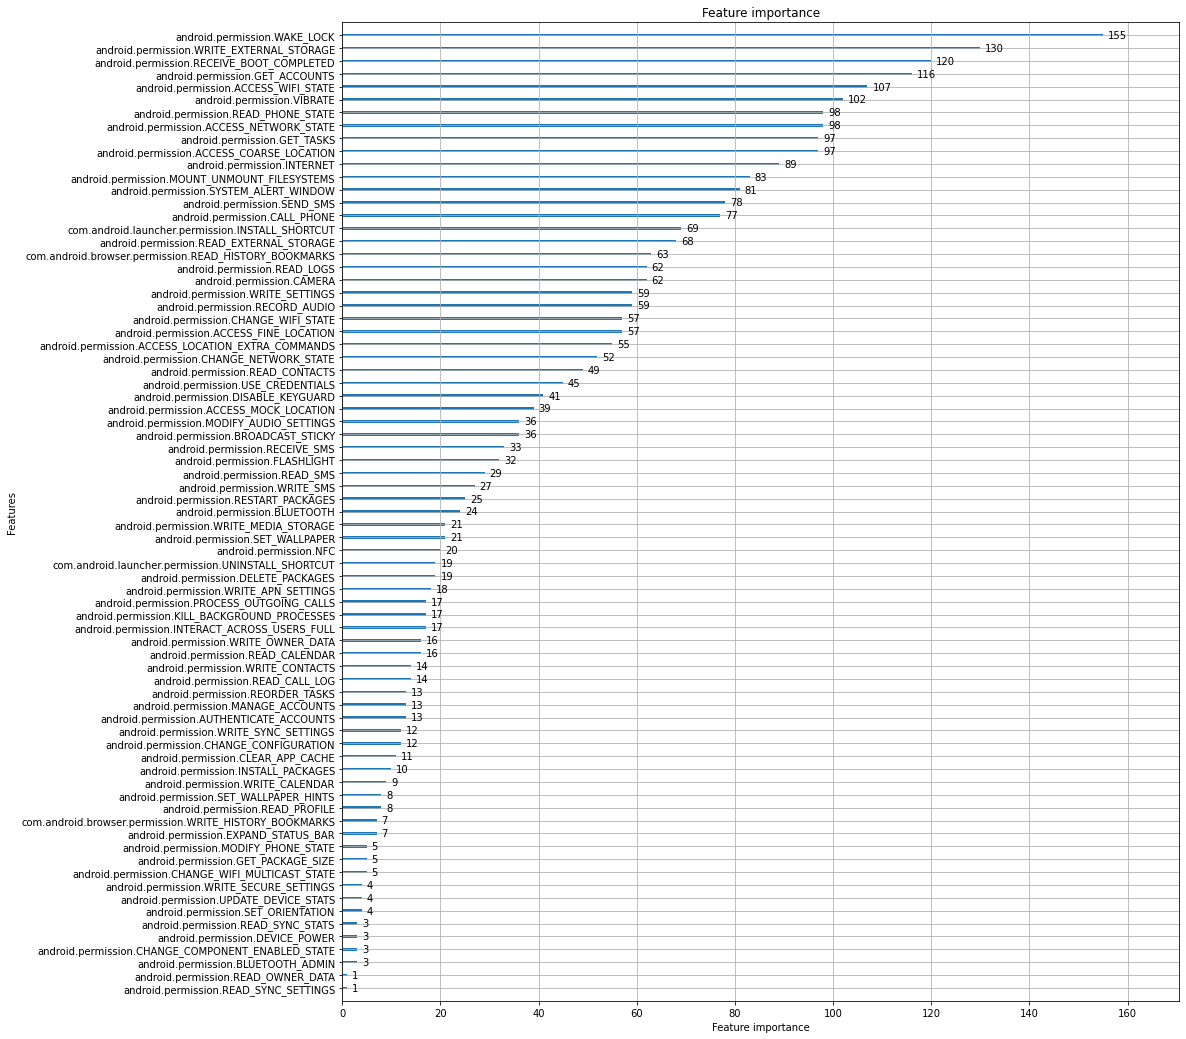

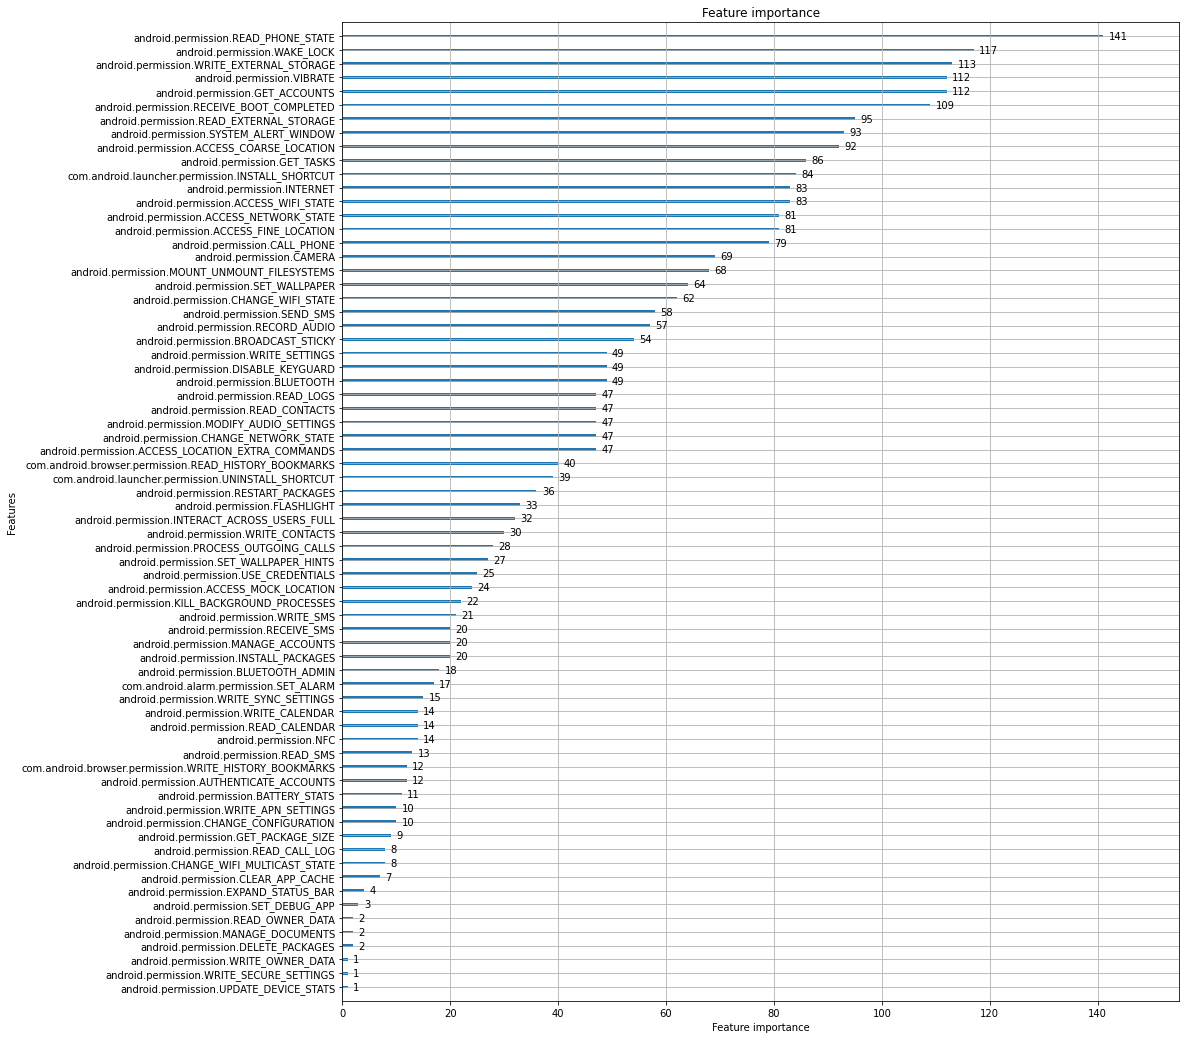

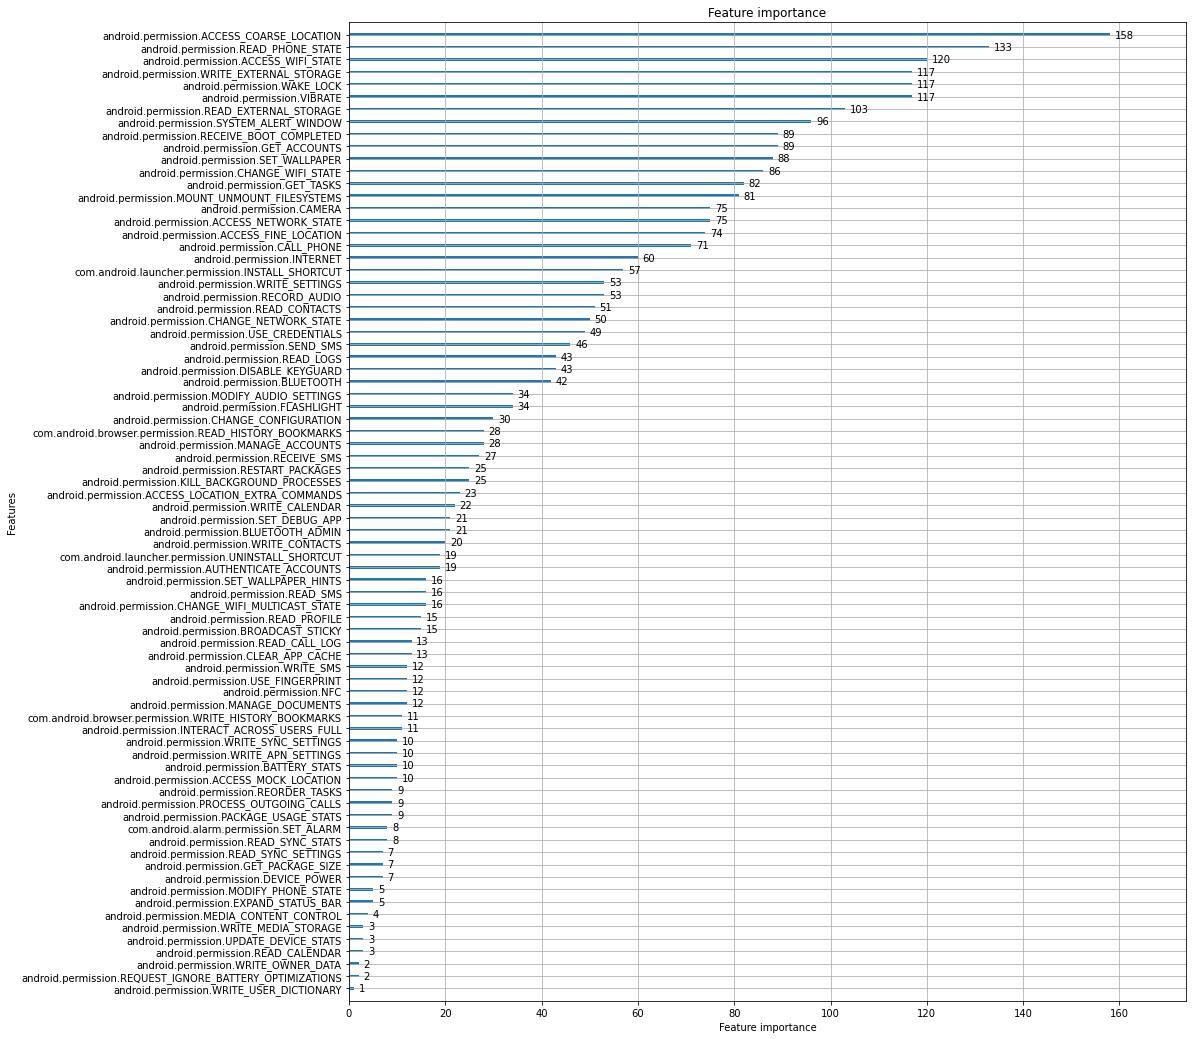

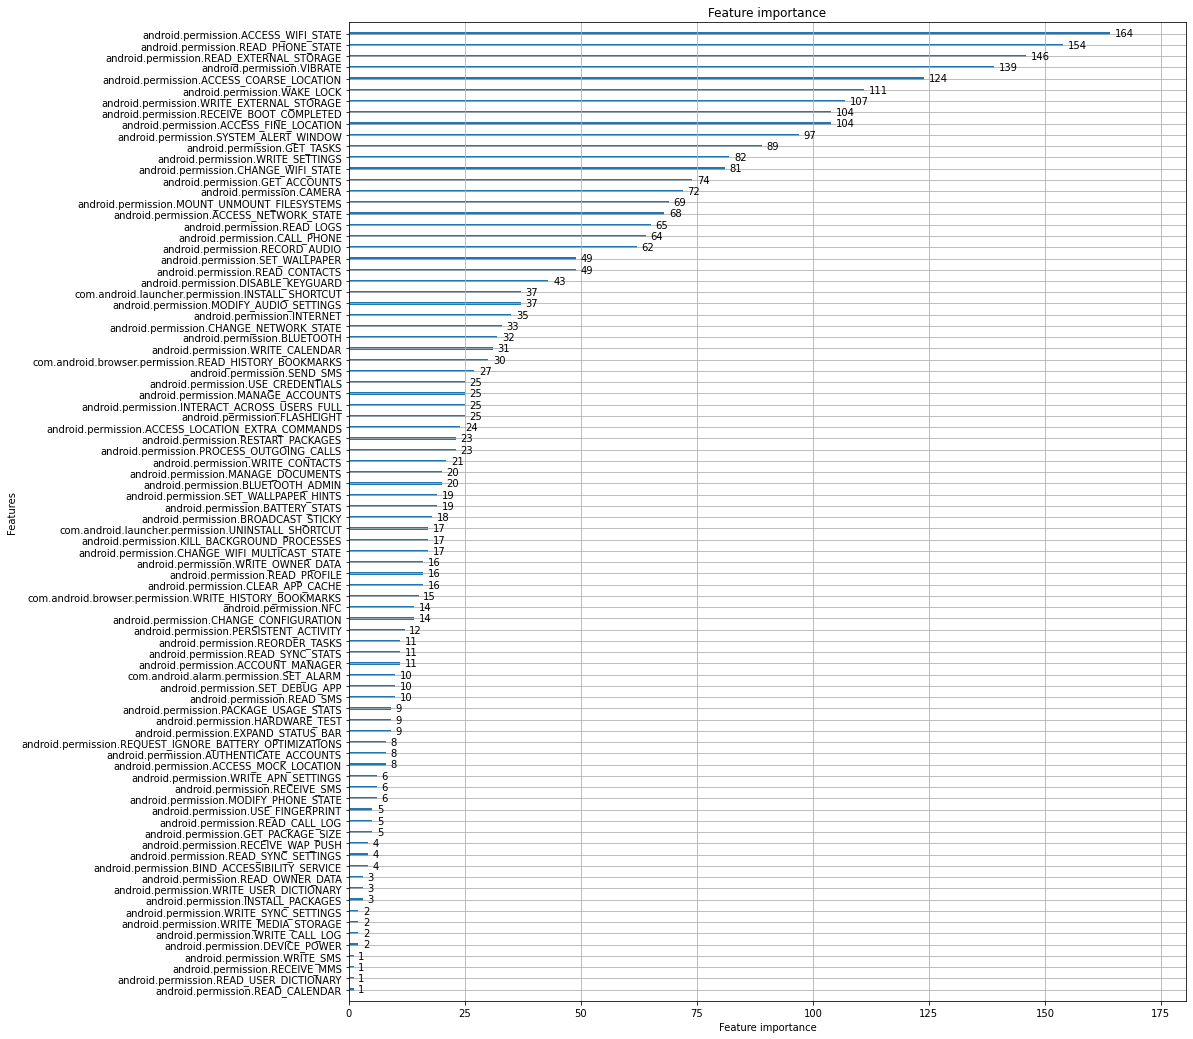

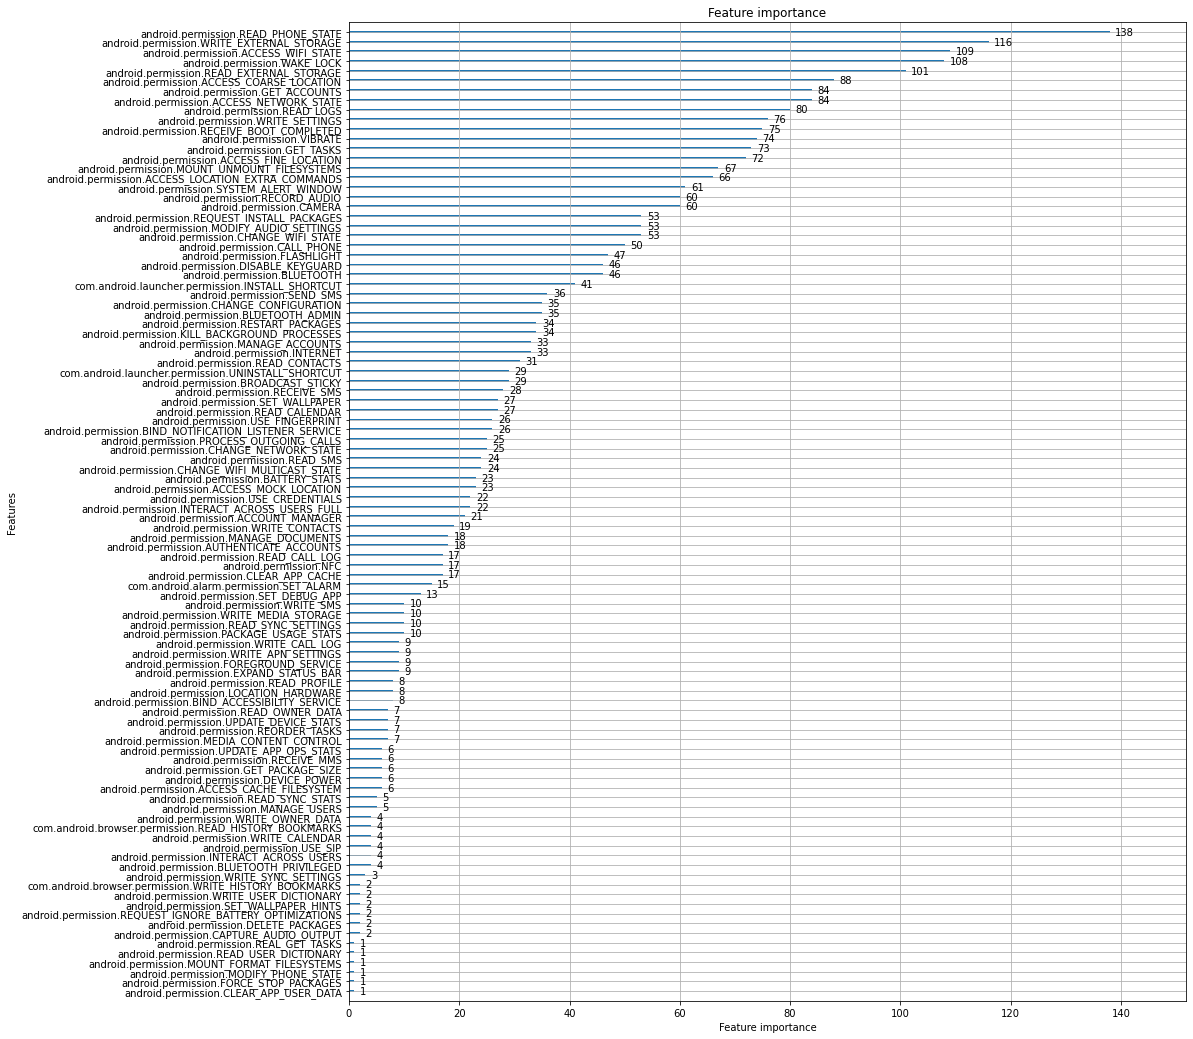

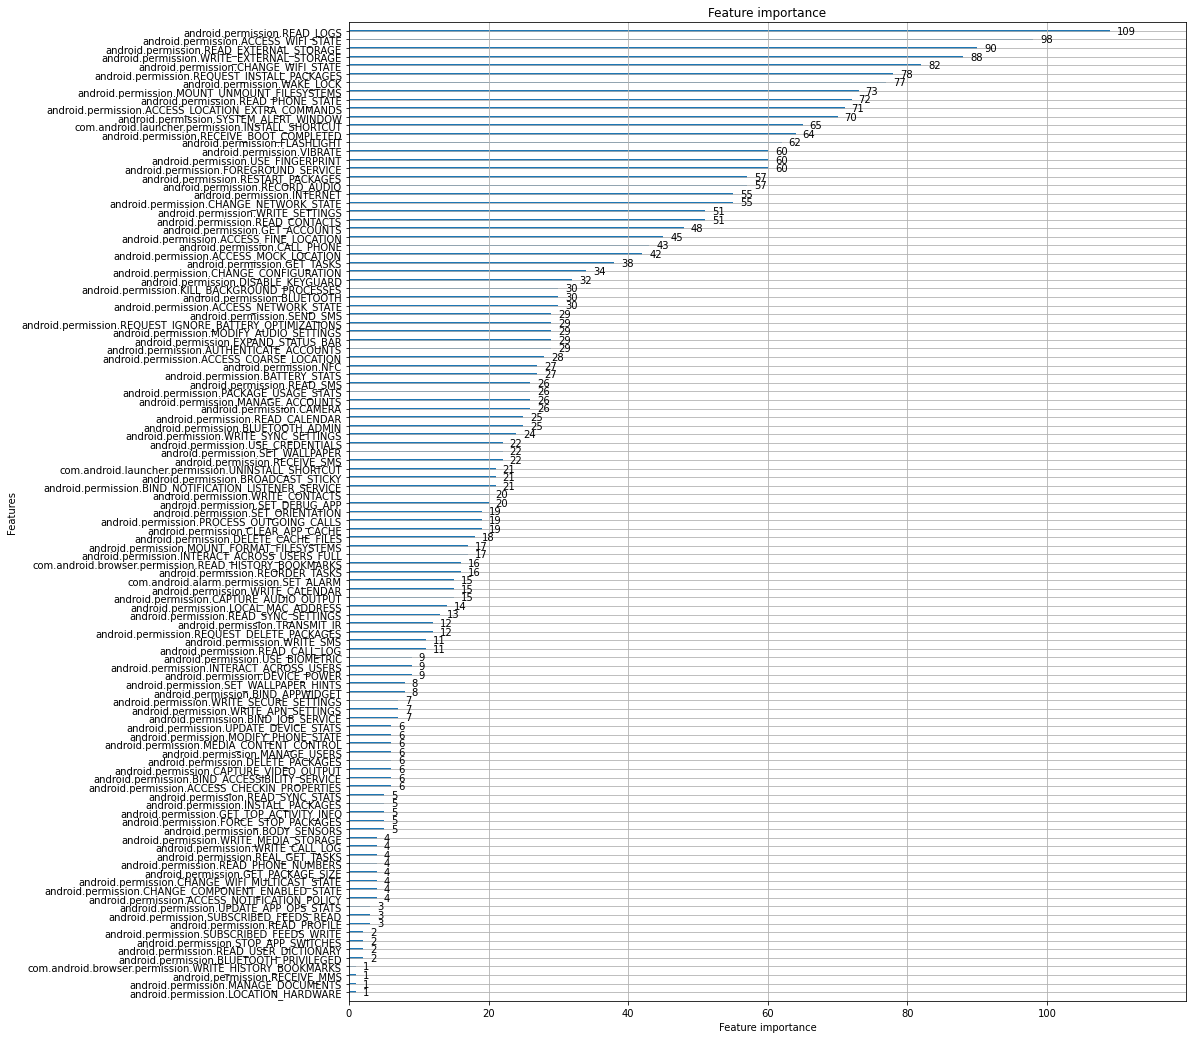

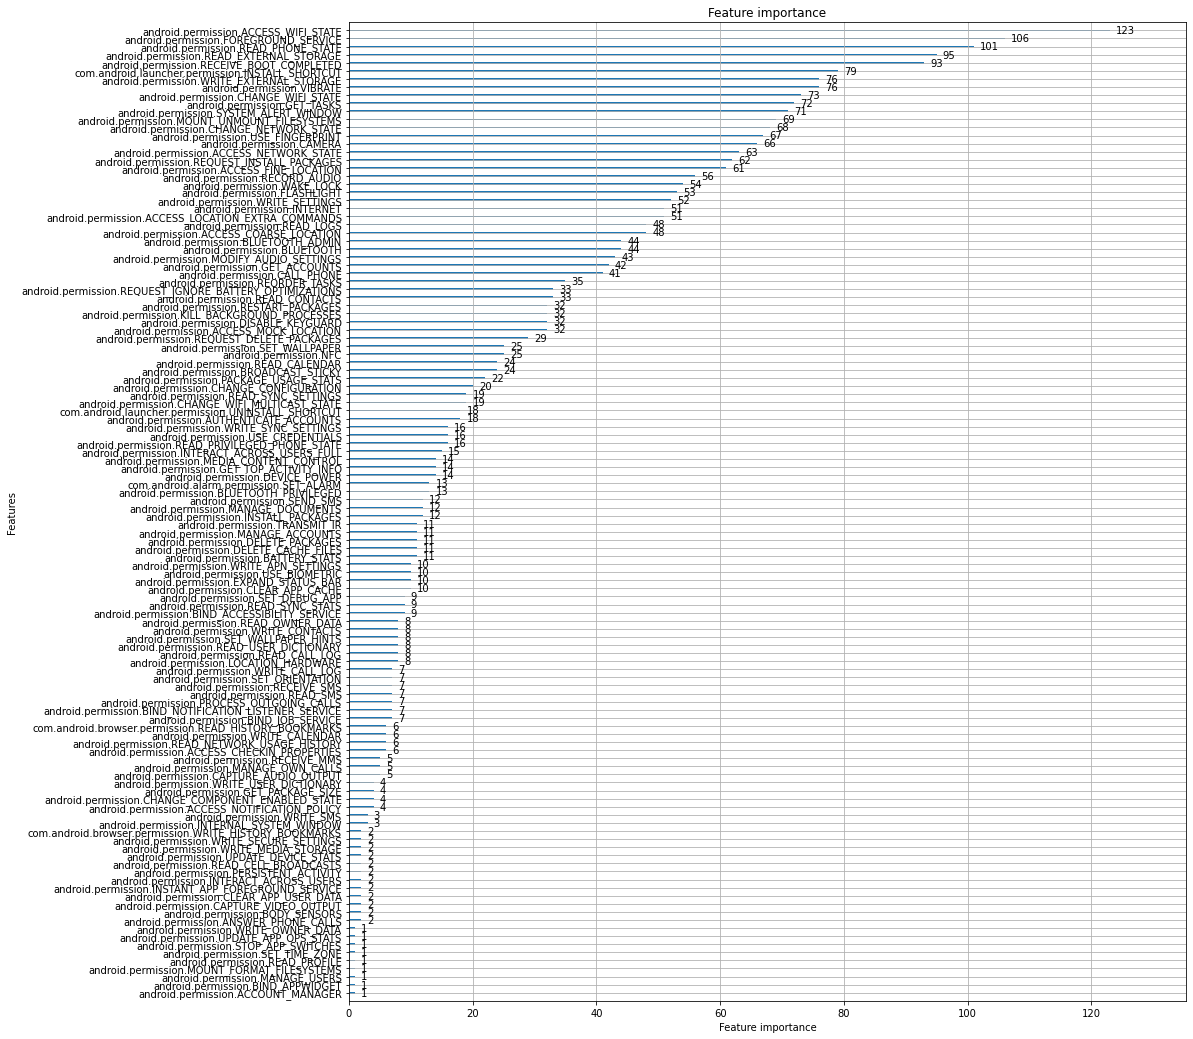

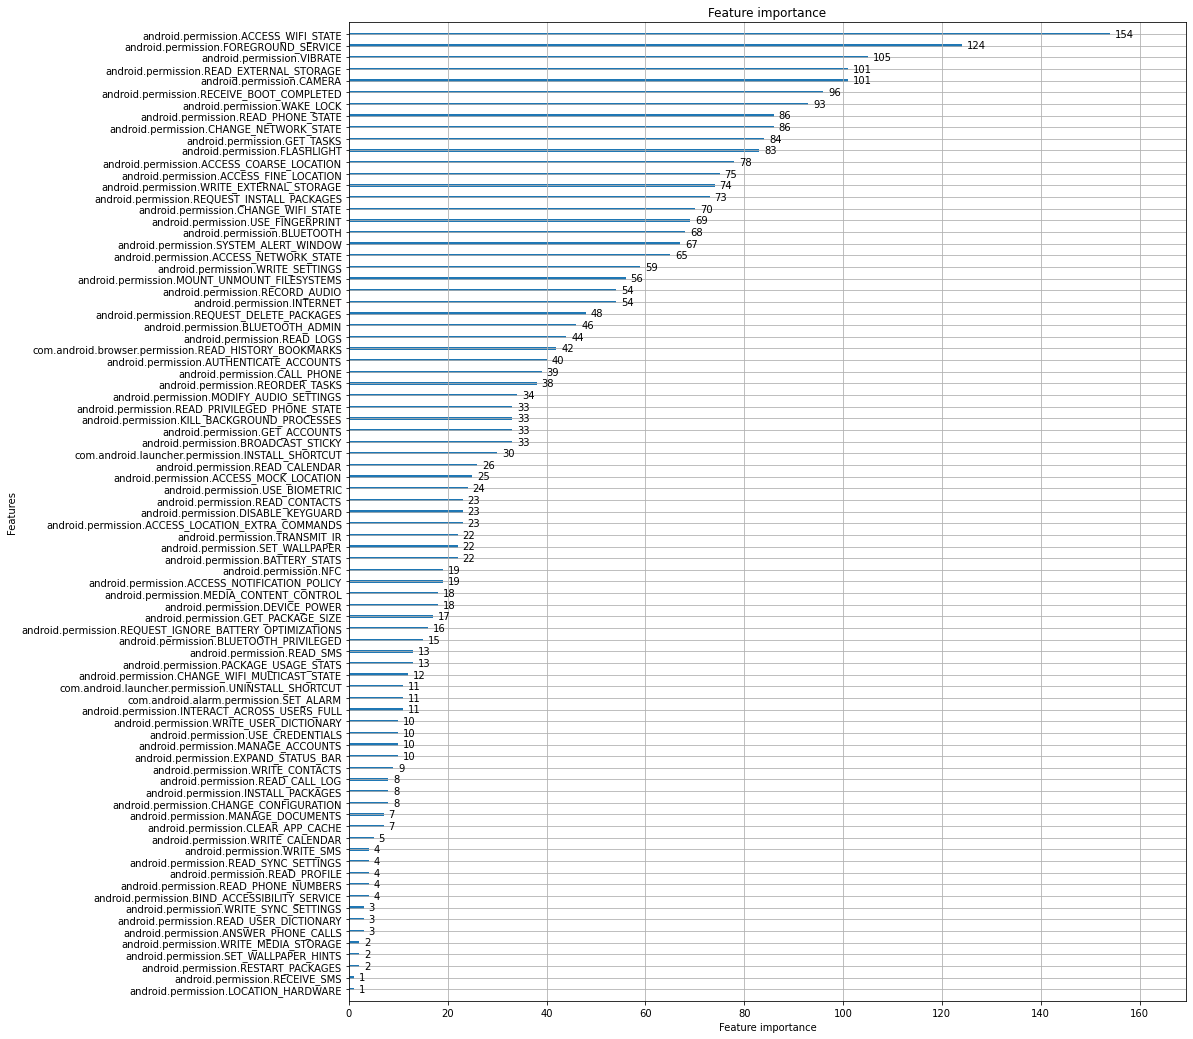

In [187]:
for i in range(2014, 2022):
    fig, ax = plt.subplots(figsize=(15,18))
    plot_importance(lgbm_models[i], ax=ax)

In [191]:
type(lgbm_models[2014].feature_importances_)

numpy.ndarray

In [190]:
type(lgbm_models[2014].feature_name_)

list

In [192]:
rank = sorted(list(zip(lgbm_models[2014].feature_importances_, lgbm_models[2014].feature_name_)), reverse=True)

In [199]:
rank[:5]

[(155, 'android.permission.WAKE_LOCK'),
 (130, 'android.permission.WRITE_EXTERNAL_STORAGE'),
 (120, 'android.permission.RECEIVE_BOOT_COMPLETED'),
 (116, 'android.permission.GET_ACCOUNTS'),
 (107, 'android.permission.ACCESS_WIFI_STATE')]

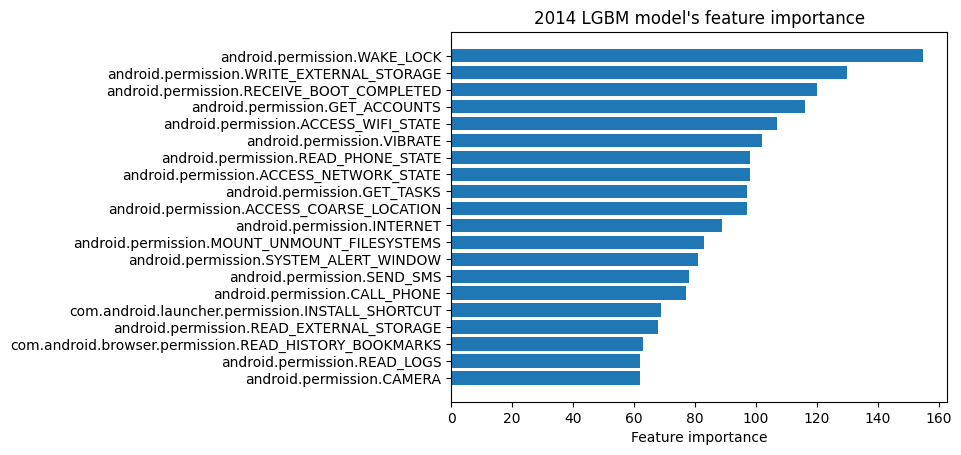

In [202]:
plt.rcdefaults()
fig, ax = plt.subplots()


feature_names = [i[1] for i in rank[:20]]

y_pos = np.arange(len(feature_names))

feature_importance = [i[0] for i in rank[:20]]
# performance = 3 + 10 * np.random.rand(len(people)) # x data
# error = np.random.rand(len(people))

ax.barh(y_pos, feature_importance, align='center')
ax.set_yticks(y_pos, labels=feature_names)
ax.invert_yaxis()
ax.set_xlabel('Feature importance')
ax.set_title('2014 LGBM model\'s feature importance')
# ax.figure.savefig("./vis/lgbm/f_importance_of_" + str(2014)+".png")


plt.show()

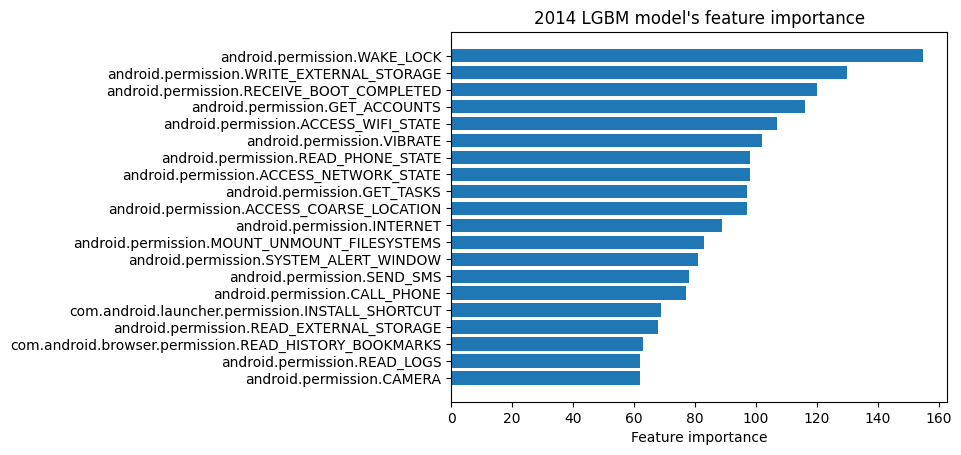

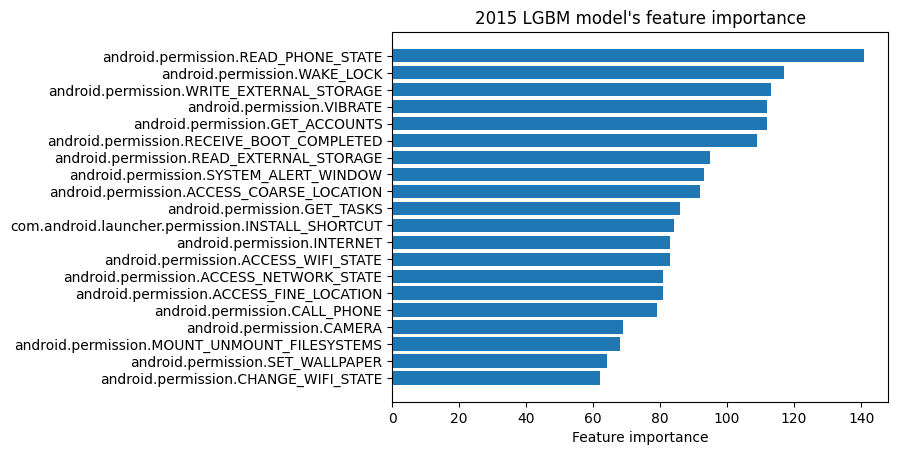

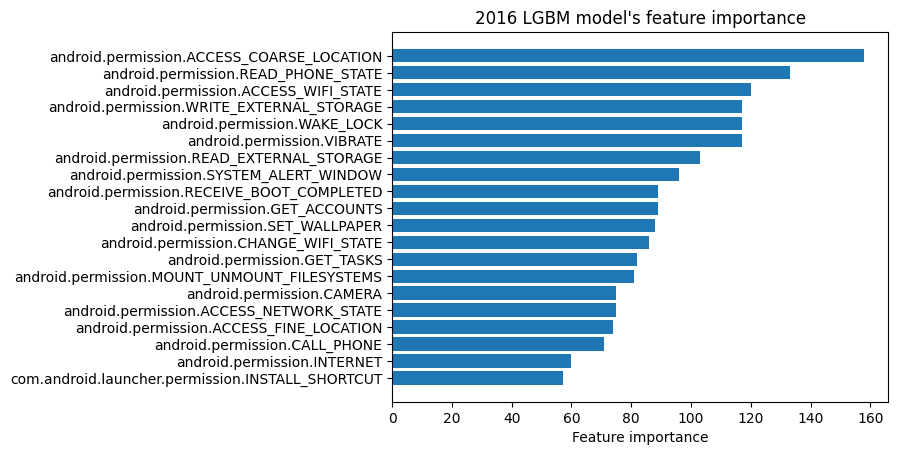

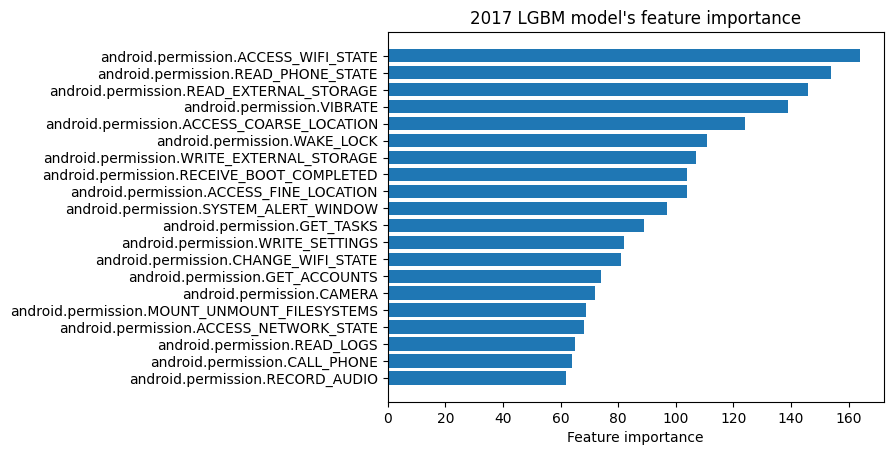

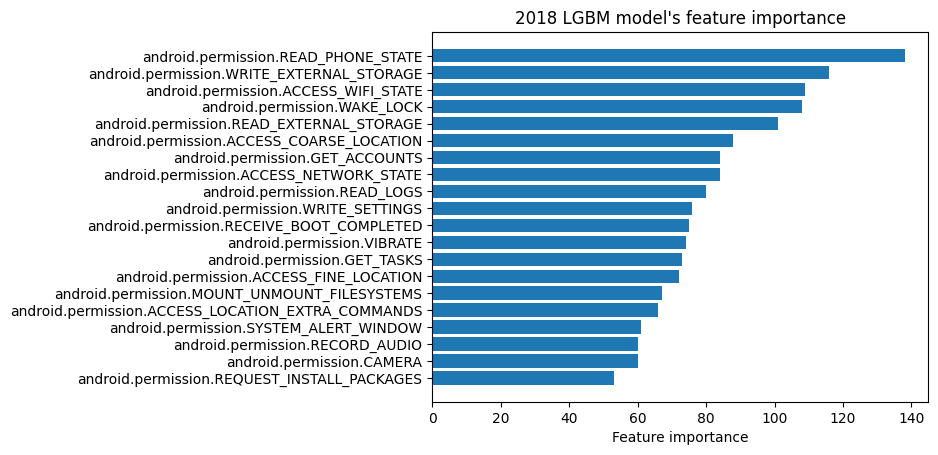

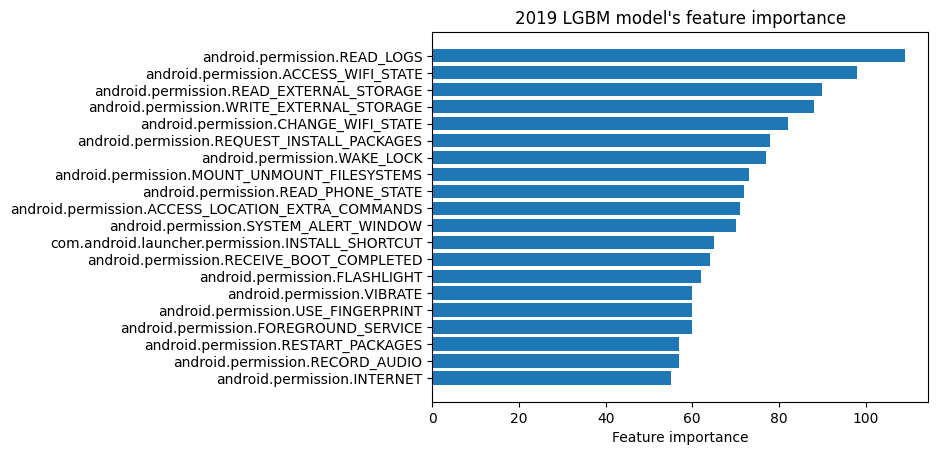

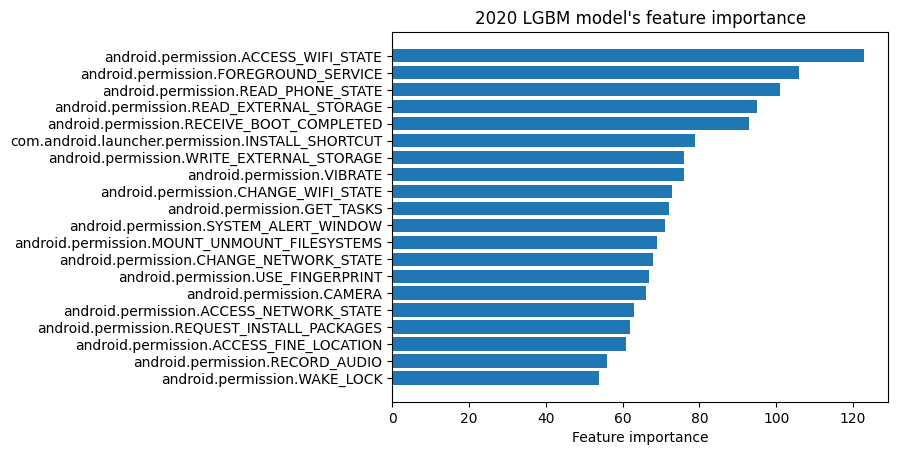

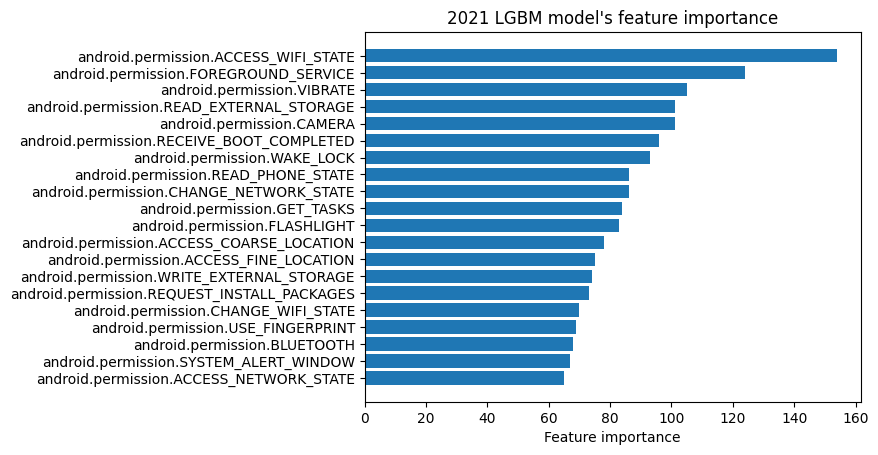

In [205]:
for y in range(2014, 2022):
    rank = sorted(list(zip(lgbm_models[y].feature_importances_, lgbm_models[y].feature_name_)), reverse=True)

    plt.rcdefaults()
    fig, ax = plt.subplots()

    feature_names = [i[1] for i in rank[:20]]
    y_pos = np.arange(len(feature_names))
    feature_importance = [i[0] for i in rank[:20]]

    ax.barh(y_pos, feature_importance, align='center')
    ax.set_yticks(y_pos, labels=feature_names)
    ax.invert_yaxis()
    ax.set_xlabel('Feature importance')
    ax.set_title(str(y)+' LGBM model\'s feature importance')
    ax.figure.savefig("./vis/lgbm/f_importance_of_" + str(y)+".png", bbox_inches='tight')


In [213]:
def savefig_f_importance(models, model_name, path, num_features):
    for y in range(2014, 2022):
        rank = sorted(list(zip(models[y].feature_importances_, lgbm_models[y].feature_name_)), reverse=True)

        plt.rcdefaults()
        fig, ax = plt.subplots()

        feature_names = [i[1] for i in rank[:num_features]]
        y_pos = np.arange(len(feature_names))
        feature_importance = [i[0] for i in rank[:num_features]]

        ax.barh(y_pos, feature_importance, align='center')
        ax.set_yticks(y_pos, labels=feature_names)
        ax.invert_yaxis()
        ax.set_xlabel('Feature importance')
        ax.set_title(str(y) + ' ' + model_name + '\'s feature importance')
        ax.figure.savefig(path + "f_importance_of_" + str(y) + ".png", bbox_inches='tight')

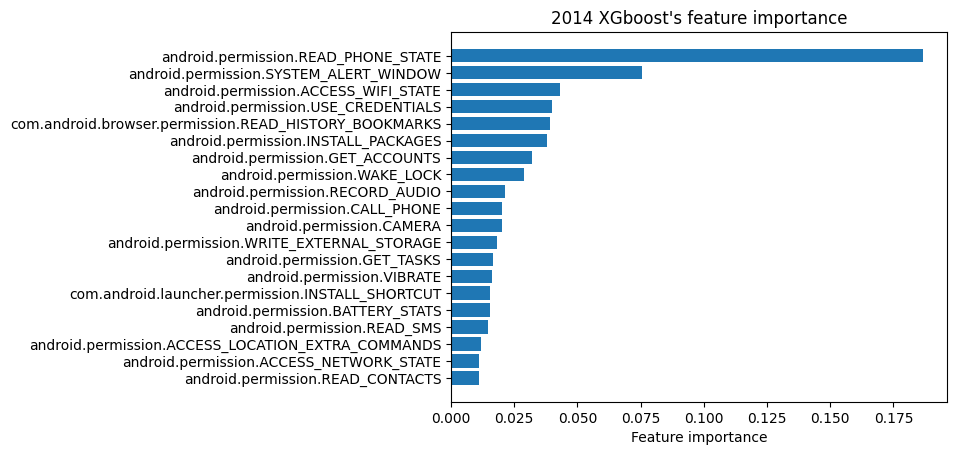

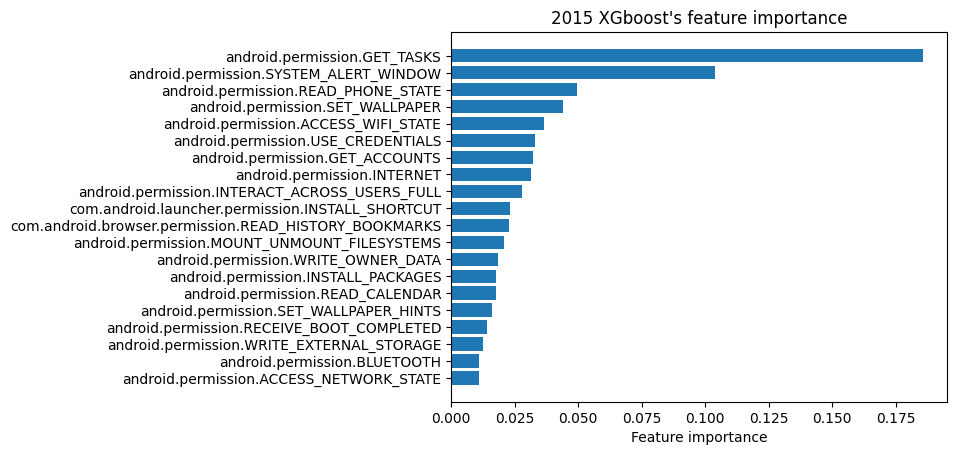

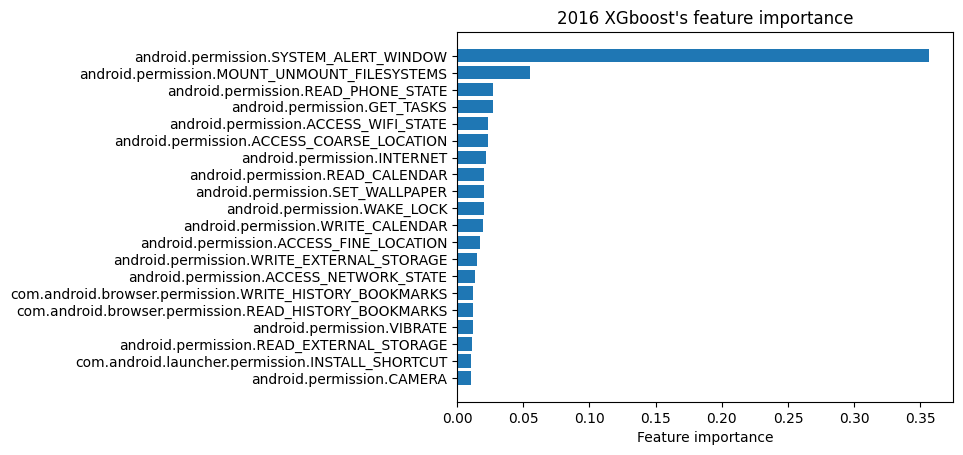

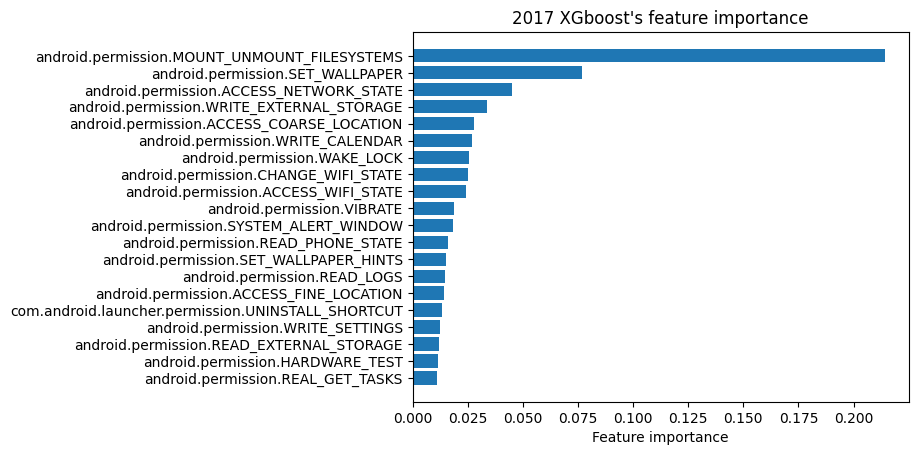

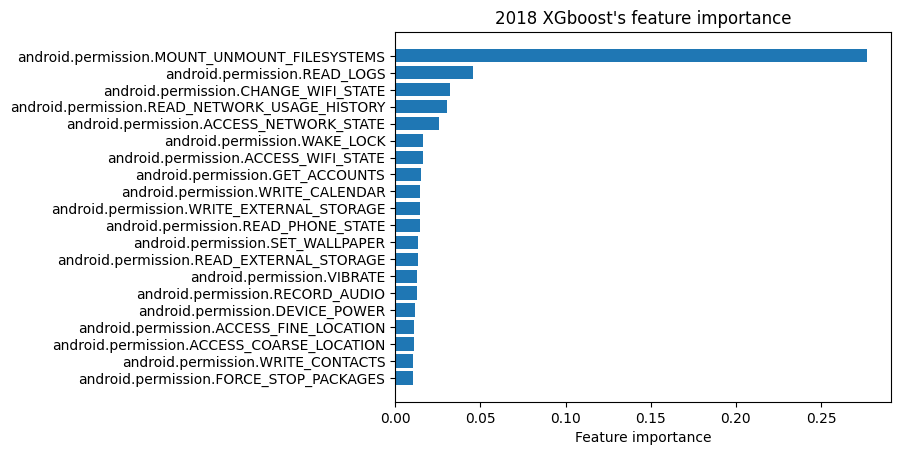

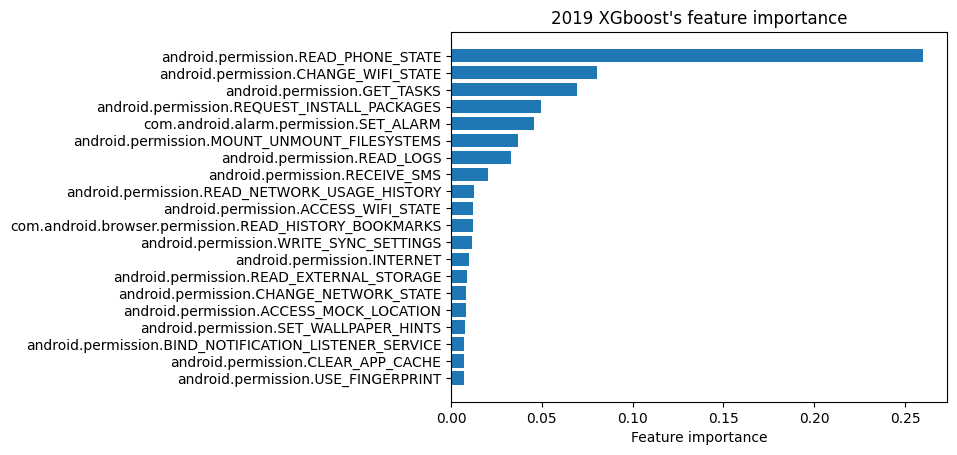

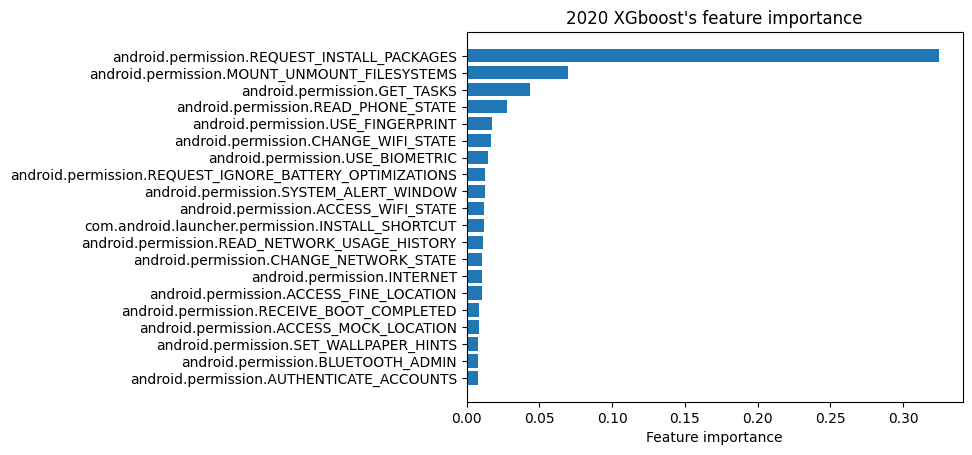

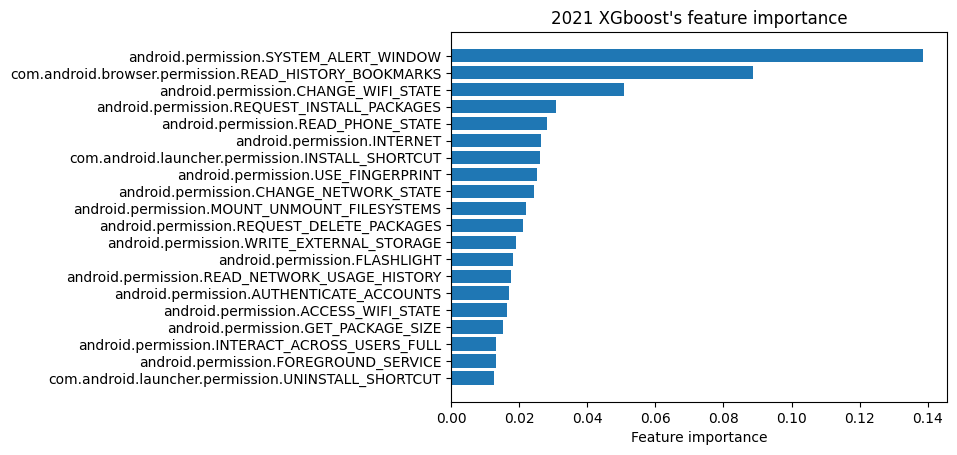

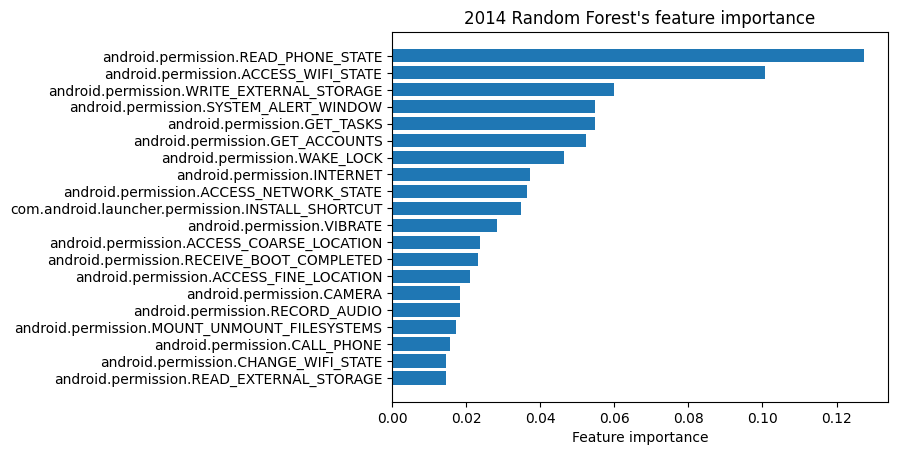

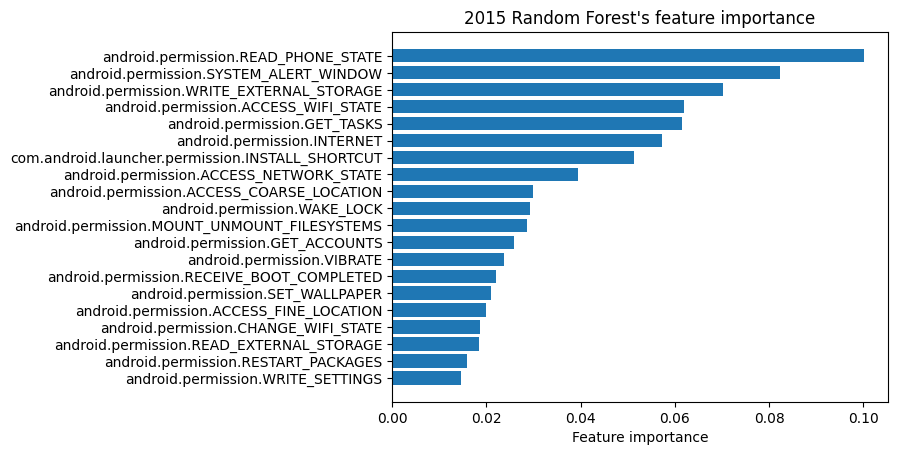

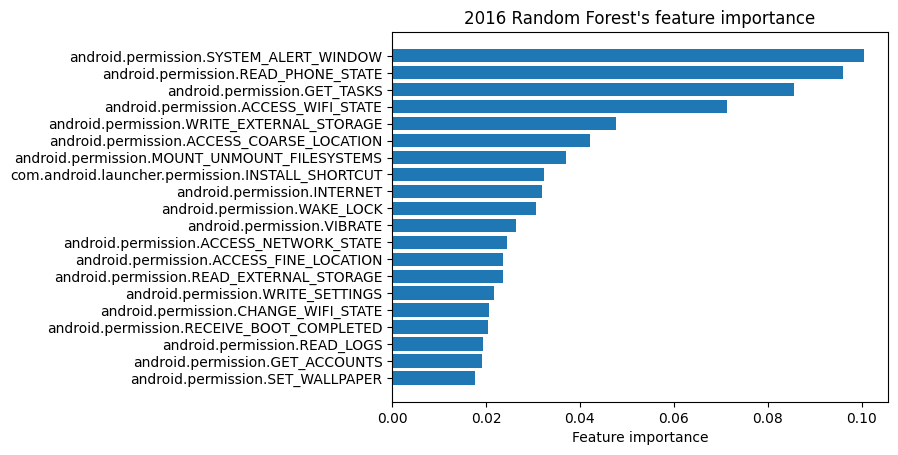

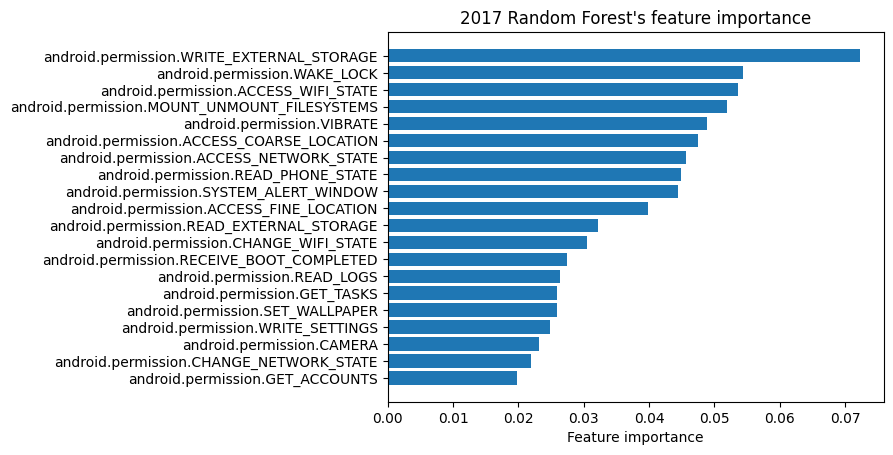

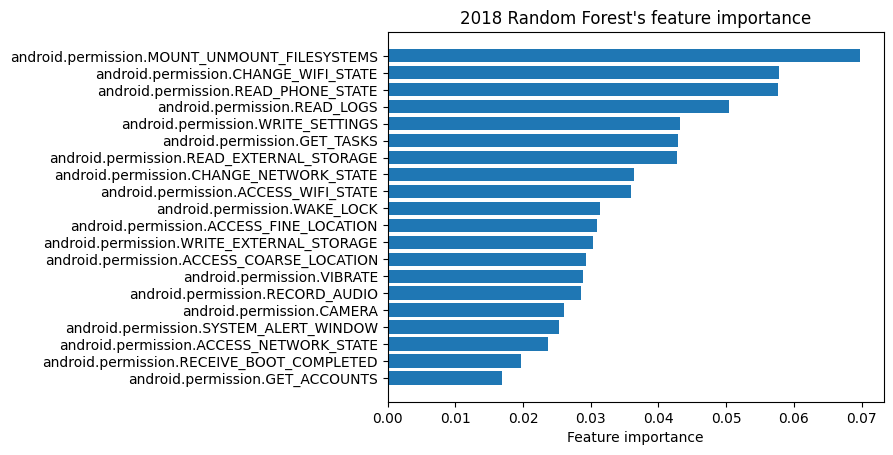

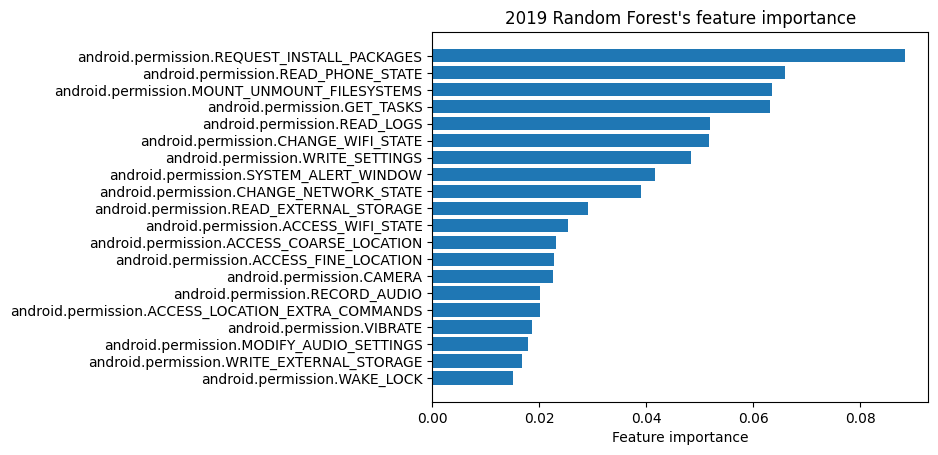

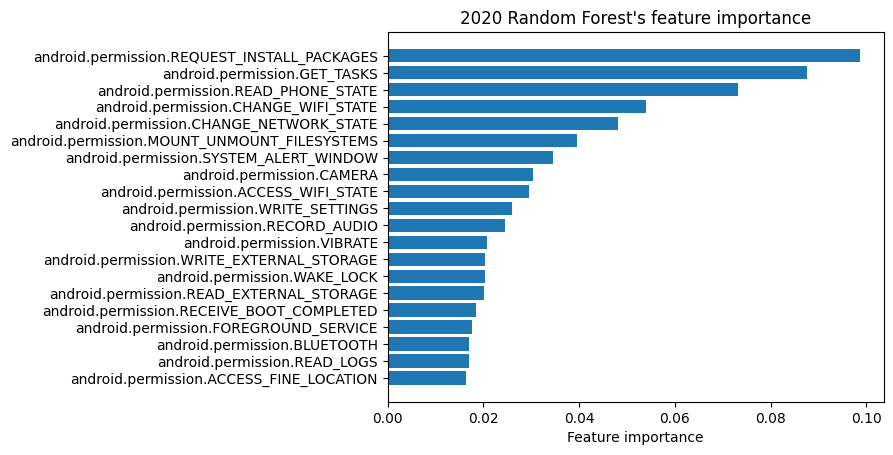

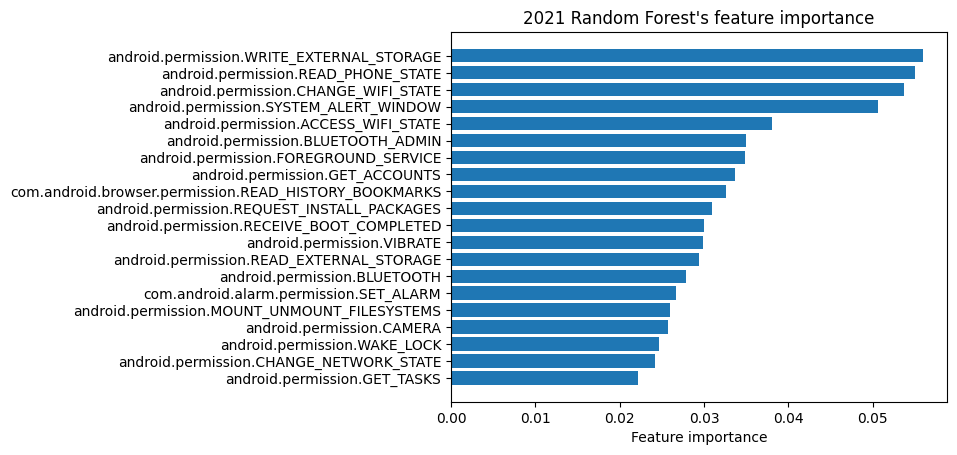

In [214]:
savefig_f_importance(xgb_models, "XGboost", "./vis/xg/", 20)
savefig_f_importance(rf_models, "Random Forest", "./vis/rf/", 20)

In [212]:
len(xgb_models[2014].feature_importances_)

474

In [210]:
rf_models[2014].feature_importances_

array(['android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.permission.ACCEPT_HANDOVER',
       'android.permission.ACCESS_AMBIENT_LIGHT_STATS',
       'android.permission.ACCESS_BROADCAST_RADIO',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY',
       'android.permission.ACCESS_DRM_CERTIFICATES',
       'android.permission.ACCESS_FINE_LOCATION',
       'android.permission.ACCESS_FM_RADIO',
       'android.permission.ACCESS_IMS_CALL_SERVICE',
       'android.permission.ACCESS_INPUT_FLINGER',
       'android.permission.ACCESS_INSTANT_APPS',
       'android.permission.ACCESS_KEYGUARD_SECURE_STORAGE',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.ACCESS_LOWPAN_STATE',
       'android.permission.ACCESS_MOCK_LOCATION',
       'android.permission.ACCESS